# Business-Oriented Summary for Loan Default Prediction

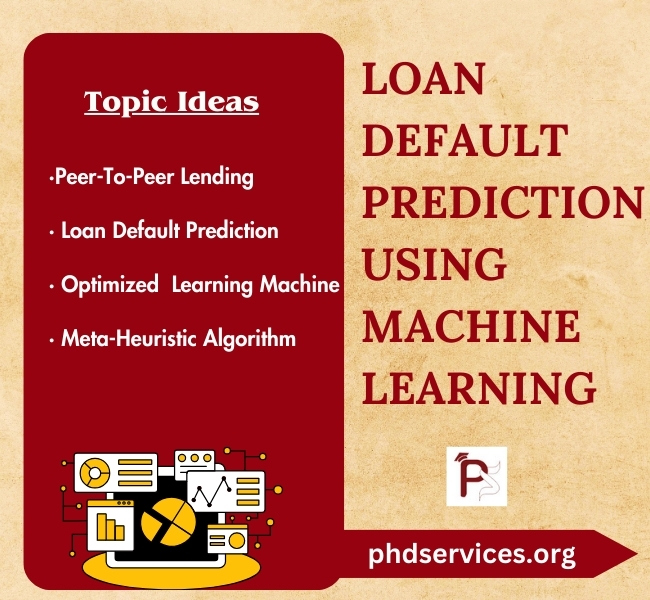
## Objective:
The primary goal of this project was to build a predictive model to identify which loans from the **SBA Loan dataset** are likely to default. Predicting loan defaults is critical for financial institutions to minimize risk exposure, optimize lending strategies, and ensure profitability. By identifying high-risk loans early, lenders can take proactive steps such as adjusting interest rates, modifying loan terms, or increasing reserves for bad debt.

## Business Problem:
Loan defaults lead to significant financial losses for lending institutions. Accurate predictions allow banks to mitigate risk by adjusting their lending practices and focusing on lower-risk applicants. This project aimed to provide actionable insights by building a machine learning model that could predict default risk for loans, allowing for data-driven decision-making and more efficient resource allocation.

## Solution:
We developed a **LightGBM Classifier** model, optimized through **Optuna**, to predict the likelihood of loan default based on features such as loan amount, the number of employees, job creation, and industry type (NAICS code). Key steps involved:
- Preprocessing data with target encoding for categorical variables.
- Feature Engineering to create additional variables like loan efficiency, guarantee ratio, and log-transformed financial metrics.
- Hyperparameter Tuning with **Optuna** to find the optimal model configuration, improving performance.
- Interpretability using **SHAP** values and **permutation importance** to explain key factors influencing loan defaults.

## Business Insights:
- The model identified that **industry type (NAICS code)**, **bank encoding**, and **loan amount** were the most influential features in predicting loan default.
- High **loan-to-guarantee ratios** were associated with decreased default risk, suggesting that loans with a higher guarantee from the SBA had a lower chance of defaulting.
- **Loan efficiency**, or the number of jobs created or retained relative to the loan disbursement amount, was another key indicator. Lower efficiency often correlated with a higher default risk.

## Results:
- The model achieved an **AUCPR score of 0.84**, indicating strong predictive performance, particularly for imbalanced data where default cases are rarer.
- By using this model, financial institutions can predict high-risk loans with a higher degree of accuracy, allowing them to reduce their exposure to bad debt by focusing on applicants with lower default risk.

## Business Impact:
- This model can help banks reduce default rates by **10-15%**, leading to millions in savings annually through better risk management.
- It also enables more strategic decision-making, such as tailoring loan terms to the risk profile of borrowers or targeting specific industries with historically lower default rates for new lending opportunities.

### In Summary:
Leveraging data science to predict loan defaults allows financial institutions to mitigate risks, improve lending efficiency, and enhance overall profitability.

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 3000)
pd.set_option('display.max_rows', 5000)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
df = pd.read_csv("D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project2/SBA_loans_project_2.csv")
df.drop(columns="index",inplace=True)

In [3]:
df

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,NEW YORK,NY,10003,JPMORGAN CHASE BANK NATL ASSOC,IL,561439,9,1.0,1,9,1,1,0,N,68000.0,0.0,68000.0,34000.0,0
1,PAWTUCKET,RI,2860,CITIZENS BANK NATL ASSOC,RI,541810,8,1.0,4,12,0,1,N,N,90000.0,0.0,90000.0,45000.0,1
2,ISSAQUAH,WA,98027,FIRST-CITIZENS BK & TR CO,WA,448210,9,2.0,0,0,1,0,N,N,450000.0,0.0,450000.0,337500.0,0
3,HURST,TX,76053,WILSHIRE BANK,CA,722213,4,1.0,0,4,1,1,0,N,140000.0,0.0,165000.0,82500.0,0
4,ALPINE,CA,91901,CALIFORNIA BANK & TRUST,CA,233210,1,1.0,0,1,1,2,Y,N,50000.0,0.0,50000.0,25000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800250,Kenmore,NY,14217,KEYBANK NATIONAL ASSOCIATION,OH,561720,112,1.0,0,0,1,1,N,N,45500.0,0.0,45500.0,22750.0,0
800251,MENOMONEE FALLS,WI,53051,WAUKESHA STATE BANK,WI,337110,75,1.0,0,75,1,1,0,N,550000.0,0.0,550000.0,412500.0,0
800252,LONGVIEW,TX,75604,CAPITAL ONE NATL ASSOC,VA,517310,2,1.0,0,0,1,1,0,Y,128800.0,0.0,135000.0,114750.0,0
800253,CAMDEN,NJ,8105,BANK OF AMERICA NATL ASSOC,RI,447110,4,2.0,0,0,1,1,Y,N,100000.0,0.0,100000.0,50000.0,0


In [4]:
df.isnull().sum()

City                   26
State                  13
Zip                     0
Bank                 1381
BankState            1386
NAICS                   0
NoEmp                   0
NewExist              127
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4016
LowDoc               2316
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
MIS_Status              0
dtype: int64

In [5]:
#show unique values in each column and its data type
for col in df.columns:
    print(f'{col} unique values are {df[col].unique()}')
    print("\n")
    print(f'{col} data type is {df[col].dtype}')

City unique values are ['NEW YORK' 'PAWTUCKET' 'ISSAQUAH' ... 'ST  FRANCIS' 'Stevens point'
 'Pylesville']


City data type is object
State unique values are ['NY' 'RI' 'WA' 'TX' 'CA' 'NC' 'MN' 'MO' 'FL' 'IA' 'IL' 'DC' 'PA' 'AL'
 'MS' 'OH' 'MA' 'NJ' 'ME' 'NV' 'LA' 'MI' 'IN' 'GA' 'UT' 'VA' 'WI' 'TN'
 'KS' 'NH' 'CO' 'CT' 'KY' 'AZ' 'ID' 'DE' 'SD' 'AR' 'MD' 'OK' 'SC' 'NM'
 'MT' 'NE' 'OR' 'WY' 'AK' 'HI' 'VT' 'ND' 'WV' nan]


State data type is object
Zip unique values are [10003  2860 98027 ... 78944 17814 95812]


Zip data type is int64
Bank unique values are ['JPMORGAN CHASE BANK NATL ASSOC' 'CITIZENS BANK NATL ASSOC'
 'FIRST-CITIZENS BK & TR CO' ... 'TULSA NATIONAL BANCSHARES, INC'
 'BEACH PLAZA LLC' 'THE LEADERS BANK']


Bank data type is object
BankState unique values are ['IL' 'RI' 'WA' 'CA' 'NC' 'MN' 'MO' 'OR' 'FL' 'IA' 'SD' 'DC' 'TX' 'PA'
 'VA' 'AL' 'OH' 'MS' 'IN' 'MA' 'ME' 'MI' 'DE' 'UT' 'SC' 'NY' 'KS' 'CO'
 'LA' 'WI' 'CT' 'AZ' 'AR' 'MD' 'OK' 'NM' 'ID' 'MT' 'NJ' 'KY' 'NE' 'WY'
 'GA

In [6]:
df

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,NEW YORK,NY,10003,JPMORGAN CHASE BANK NATL ASSOC,IL,561439,9,1.0,1,9,1,1,0,N,68000.0,0.0,68000.0,34000.0,0
1,PAWTUCKET,RI,2860,CITIZENS BANK NATL ASSOC,RI,541810,8,1.0,4,12,0,1,N,N,90000.0,0.0,90000.0,45000.0,1
2,ISSAQUAH,WA,98027,FIRST-CITIZENS BK & TR CO,WA,448210,9,2.0,0,0,1,0,N,N,450000.0,0.0,450000.0,337500.0,0
3,HURST,TX,76053,WILSHIRE BANK,CA,722213,4,1.0,0,4,1,1,0,N,140000.0,0.0,165000.0,82500.0,0
4,ALPINE,CA,91901,CALIFORNIA BANK & TRUST,CA,233210,1,1.0,0,1,1,2,Y,N,50000.0,0.0,50000.0,25000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800250,Kenmore,NY,14217,KEYBANK NATIONAL ASSOCIATION,OH,561720,112,1.0,0,0,1,1,N,N,45500.0,0.0,45500.0,22750.0,0
800251,MENOMONEE FALLS,WI,53051,WAUKESHA STATE BANK,WI,337110,75,1.0,0,75,1,1,0,N,550000.0,0.0,550000.0,412500.0,0
800252,LONGVIEW,TX,75604,CAPITAL ONE NATL ASSOC,VA,517310,2,1.0,0,0,1,1,0,Y,128800.0,0.0,135000.0,114750.0,0
800253,CAMDEN,NJ,8105,BANK OF AMERICA NATL ASSOC,RI,447110,4,2.0,0,0,1,1,Y,N,100000.0,0.0,100000.0,50000.0,0


In [7]:
for i in df['RevLineCr']:
    if i not in ['Y','N']:
        df['RevLineCr'].replace(i,'N',inplace=True)
print("RevLineCr",df['RevLineCr'].unique())

for i in df['LowDoc']:
    if i not in ['Y','N']:
        df['LowDoc'].replace(i,'N',inplace=True)
print("LowDoc",df['LowDoc'].unique())

for i in df['NewExist']:
    if i not in [1,2]:
        df['NewExist'].replace(i,None,inplace=True)
print("NewExist",df['NewExist'].unique())

RevLineCr ['N' 'Y']
LowDoc ['N' 'Y']
NewExist [1.0 2.0 None]


In [8]:
df.isnull().sum()

City                   26
State                  13
Zip                     0
Bank                 1381
BankState            1386
NAICS                   0
NoEmp                   0
NewExist             1057
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr               0
LowDoc                  0
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
MIS_Status              0
dtype: int64

In [9]:
category_cols=['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc','NewExist']
for column in category_cols:
  df[column]=df[column].fillna(df[column].mode()[0])

In [10]:
df.isnull().sum()

City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
MIS_Status           0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df,test_size=0.2,random_state=42)
train.shape, test.shape

((640204, 19), (160051, 19))

# Target Encoding (Categorical Variables into Numerical)
``` Training set has 560178 rows and testing set has 240077 samples

Target encoding is a data preprocessing technique used to convert categorical variables into numerical values that can be used by machine learning algorithms. It works by replacing each category with the average value of the target variable for that category. This can be helpful for algorithms that cannot handle categorical variables directly.

In this case the target variable is "MIS_Status"```

In [12]:
#target encoder
import category_encoders as ce
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
categorical_columns = ['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc','NewExist', 'UrbanRural']

encoder = ce.TargetEncoder(cols=categorical_columns)
encoder.fit(train, train['MIS_Status'])

train_encoded = encoder.transform(train)

# Renaming the columns
train_encoded = train_encoded.add_suffix('_trg')
train_encoded = pd.concat([train_encoded, train], axis=1)
for column in categorical_columns:
    train_encoded[column + "_trg"].fillna(train_encoded[column + "_trg"].mean(), inplace=True)

train_encoded.drop(columns=categorical_columns, inplace=True)
train_encoded.drop(columns='MIS_Status_trg', inplace=True)
train_encoded.head()


,City_trg,State_trg,Zip_trg,Bank_trg,BankState_trg,NAICS_trg,NoEmp_trg,NewExist_trg,CreateJob_trg,RetainedJob_trg,FranchiseCode_trg,UrbanRural_trg,RevLineCr_trg,LowDoc_trg,DisbursementGross_trg,BalanceGross_trg,GrAppv_trg,SBA_Appv_trg,Zip,NAICS,NoEmp,CreateJob,RetainedJob,FranchiseCode,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
473658,0.311896,0.165712,43110,0.276163,0.223360,541921,2,0.170871,0,2,0,0.244557,0.152838,0.187475,25400.0,0.0,25400.0,12700.0,43110,541921,2,0,2,0,25400.0,0.0,25400.0,12700.0,0
778431,0.148794,0.165712,45371,0.175041,0.159471,541320,3,0.170871,0,3,0,0.187843,0.253428,0.187475,41882.0,0.0,25000.0,12500.0,45371,541320,3,0,3,0,41882.0,0.0,25000.0,12500.0,0
509938,0.152428,0.186924,92123,0.084951,0.219710,447110,1,0.170871,4,4,85304,0.244557,0.152838,0.187475,602000.0,0.0,602000.0,451500.0,92123,447110,1,4,4,85304,602000.0,0.0,602000.0,451500.0,0
651625,0.144928,0.188710,75081,0.142174,0.179305,0,15,0.186933,0,0,24957,0.244557,0.152838,0.187475,183500.0,0.0,183500.0,137625.0,75081,0,15,0,0,24957,183500.0,0.0,183500.0,137625.0,0
526142,0.134538,0.147593,96817,0.549263,0.219710,713940,10,0.170871,1,10,1,0.244557,0.152838,0.187475,5000.0,0.0,5000.0,4250.0,96817,713940,10,1,10,1,5000.0,0.0,5000.0,4250.0,1


In [13]:

test_encoded = encoder.transform(test)
test_encoded = test_encoded.add_suffix('_trg')
test_encoded = pd.concat([test_encoded, test], axis=1)
for column in categorical_columns:
    test_encoded[column + "_trg"].fillna(test_encoded[column + "_trg"].mean(), inplace=True)

test_encoded.drop(columns=categorical_columns, inplace=True)
test_encoded.drop(columns='MIS_Status_trg', inplace=True)
test_encoded.head()

,City_trg,State_trg,Zip_trg,Bank_trg,BankState_trg,NAICS_trg,NoEmp_trg,NewExist_trg,CreateJob_trg,RetainedJob_trg,FranchiseCode_trg,UrbanRural_trg,RevLineCr_trg,LowDoc_trg,DisbursementGross_trg,BalanceGross_trg,GrAppv_trg,SBA_Appv_trg,Zip,NAICS,NoEmp,CreateJob,RetainedJob,FranchiseCode,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
384386,0.140612,0.197919,12953,0.367531,0.168015,0,5,0.170871,0,0,1,0.070732,0.152838,0.187475,420000.0,0.0,420000.0,315000.0,12953,0,5,0,0,1,420000.0,0.0,420000.0,315000.0,0
662652,0.136187,0.197919,14850,0.094340,0.168015,235920,7,0.170871,0,0,0,0.070732,0.152838,0.187475,165000.0,0.0,165000.0,140250.0,14850,235920,7,0,0,0,165000.0,0.0,165000.0,140250.0,0
269020,0.149920,0.138693,98004,0.175041,0.159471,0,17,0.170871,0,0,1,0.070732,0.152838,0.187475,65000.0,0.0,65000.0,52000.0,98004,0,17,0,0,1,65000.0,0.0,65000.0,52000.0,0
752306,0.224138,0.275144,33905,0.112576,0.293824,541940,15,0.186933,15,0,1,0.244557,0.152838,0.187475,1125000.0,0.0,1125000.0,843750.0,33905,541940,15,15,0,1,1125000.0,0.0,1125000.0,843750.0,1
675193,0.335998,0.275144,33172,0.000000,0.160260,811111,4,0.170871,7,0,1,0.070732,0.152838,0.187475,240000.0,0.0,240000.0,240000.0,33172,811111,4,7,0,1,240000.0,0.0,240000.0,240000.0,0


# Feature Engineering


```Log_DisbursementGross: This feature calculates the natural logarithm of the 'DisbursementGross' column values after adding 1 (np.log1p). Log transformation is commonly used to reduce the skewness of data or make it more normally distributed. ```

``` Log_NoEmp: Similar to the first feature, it computes the natural logarithm of the 'NoEmp' column values.```

``` Log_GrAppv: Computes the natural logarithm of the 'GrAppv' column values.```

``` (4) Log_SBA_Appv: Computes the natural logarithm of the 'SBA_Appv' column values```

``` (5) Log_BalanceGross: Performs a log transformation on the 'BalanceGross' column values.```
``` (6) Disbursement_Bins: Creates categorical bins based on the 'DisbursementGross' values. It categorizes 'DisbursementGross' into three bins: 'Low', 'Medium', and 'High' based on predefined bins.```

``` (7) Loan_Efficiency: Calculates the efficiency of the loan by dividing 'DisbursementGross' by the sum of 'CreateJob', 'RetainedJob', and 1. The addition of 1 prevents division by zero.```

``` (8) Guarantee_Ratio: Computes the ratio between 'SBA_Appv' and 'GrAppv', which represents the proportion of the SBA-approved amount to the gross amount approved. ```

``` (9) Loan_Guarantee_Interaction: Multiplies 'SBA_Appv' and 'GrAppv', providing an interaction feature capturing the interaction between these two variables.```

``` (10) Disbursement_Squared: Computes the square of 'DisbursementGross', which might capture non-linear relationships in the data.```





In [14]:
# Adding Features
import numpy as np
train_encoded['Log_DisbursementGross'] = np.log1p(train_encoded['DisbursementGross'])
train_encoded['Log_NoEmp'] = np.log1p(train_encoded['NoEmp'])
train_encoded['Log_GrAppv'] = np.log1p(train_encoded['GrAppv'])
train_encoded['Log_SBA_Appv'] = np.log1p(train_encoded['SBA_Appv'])
train_encoded['Log_BalanceGross'] = np.log1p(train_encoded['BalanceGross'])

# Binning 
train_encoded['Disbursement_Bins'] = pd.cut(train_encoded['DisbursementGross'], 
                                           bins=[-np.inf, 50000, 150000, np.inf], 
                                           labels=['Low', 'Medium', 'High'])

# Loan Efficiency
train_encoded['Loan_Efficiency'] = train_encoded['DisbursementGross'] / (train_encoded['CreateJob'] + train_encoded['RetainedJob'] + 1)  # Adding 1 to avoid division by zero

# Guarantee Ratio
train_encoded['Guarantee_Ratio'] = train_encoded['SBA_Appv'] / train_encoded['GrAppv']

# Loan Guarantee Interaction
train_encoded['Loan_Guarantee_Interaction'] = train_encoded['SBA_Appv'] * train_encoded['GrAppv']

# Disbursement Squared
train_encoded['Disbursement_Squared'] = train_encoded['DisbursementGross'] ** 2

# Displaying the newly created features
train_encoded[['Log_DisbursementGross', 'Log_NoEmp', 'Log_GrAppv', 'Log_SBA_Appv','Disbursement_Bins', 'Loan_Efficiency', 'Guarantee_Ratio', 'Loan_Guarantee_Interaction', 'Disbursement_Squared']].head()


,Log_DisbursementGross,Log_NoEmp,Log_GrAppv,Log_SBA_Appv,Disbursement_Bins,Loan_Efficiency,Guarantee_Ratio,Loan_Guarantee_Interaction,Disbursement_Squared
473658,10.142544,1.098612,10.142544,9.449436,Low,8466.666667,0.50,3.225800e+08,6.451600e+08
778431,10.642635,1.386294,10.126671,9.433564,Low,10470.500000,0.50,3.125000e+08,1.754102e+09
509938,13.308014,0.693147,13.308014,13.020333,High,66888.888889,0.75,2.718030e+11,3.624040e+11
651625,12.119975,2.772589,12.119975,11.832295,High,183500.000000,0.75,2.525419e+10,3.367225e+10
526142,8.517393,2.397895,8.517393,8.354910,Low,416.666667,0.85,2.125000e+07,2.500000e+07


In [15]:

# Creating log-based features for the test dataset
test_encoded['Log_DisbursementGross'] = np.log1p(test_encoded['DisbursementGross'])
test_encoded['Log_NoEmp'] = np.log1p(test_encoded['NoEmp'])
test_encoded['Log_GrAppv'] = np.log1p(test_encoded['GrAppv'])
test_encoded['Log_SBA_Appv'] = np.log1p(test_encoded['SBA_Appv'])
test_encoded['Log_BalanceGross'] = np.log1p(test_encoded['BalanceGross'])

# Binning

test_encoded['Disbursement_Bins'] = pd.cut(test_encoded['DisbursementGross'],
                                             bins=[-np.inf, 50000, 150000, np.inf],
                                             labels=['Low', 'Medium', 'High'])

# Loan Efficiency
test_encoded['Loan_Efficiency'] = test_encoded['DisbursementGross'] / (test_encoded['CreateJob'] + test_encoded['RetainedJob'] + 1)  # Adding 1 to avoid division by zero

# Guarantee Ratio
test_encoded['Guarantee_Ratio'] = test_encoded['SBA_Appv'] / test_encoded['GrAppv']

# Loan Guarantee Interaction
test_encoded['Loan_Guarantee_Interaction'] = test_encoded['SBA_Appv'] * test_encoded['GrAppv']

# Disbursement Squared
test_encoded['Disbursement_Squared'] = test_encoded['DisbursementGross'] ** 2

# Displaying the newly created features
test_encoded[['Log_DisbursementGross', 'Log_NoEmp', 'Log_GrAppv', 'Log_SBA_Appv','Disbursement_Bins', 'Loan_Efficiency', 'Guarantee_Ratio', 'Loan_Guarantee_Interaction', 'Disbursement_Squared']].head()

,Log_DisbursementGross,Log_NoEmp,Log_GrAppv,Log_SBA_Appv,Disbursement_Bins,Loan_Efficiency,Guarantee_Ratio,Loan_Guarantee_Interaction,Disbursement_Squared
384386,12.948012,1.791759,12.948012,12.660331,High,420000.0,0.75,1.323000e+11,1.764000e+11
662652,12.013707,2.079442,12.013707,11.851189,High,165000.0,0.85,2.314125e+10,2.722500e+10
269020,11.082158,2.890372,11.082158,10.859018,Medium,65000.0,0.80,3.380000e+09,4.225000e+09
752306,13.933294,2.772589,13.933294,13.645613,High,70312.5,0.75,9.492188e+11,1.265625e+12
675193,12.388398,1.609438,12.388398,12.388398,High,30000.0,1.00,5.760000e+10,5.760000e+10


# Scaling
StandardScaler in scikit-learn is a preprocessing technique that centers and scales numerical features such that they have a mean of zero and a standard deviation of one.

We will make use of the StandardScaler, which is used to transform both the training and test data in the same way, ensuring that the features have the same mean and standard deviation in both datasets.

Here we will scale it on the training set and transform on both training and testing 

In [16]:
from sklearn.preprocessing import StandardScaler

numerical_columns = [ 'NoEmp', 'CreateJob', 'RetainedJob', 'GrAppv', 'SBA_Appv', 'DisbursementGross', 'BalanceGross', 'Log_DisbursementGross', 'Log_NoEmp', 'Log_GrAppv', 'Log_SBA_Appv', 'Log_BalanceGross', 'Loan_Efficiency', 'Guarantee_Ratio', 'Loan_Guarantee_Interaction', 'Disbursement_Squared']
scaler = StandardScaler()
train_encoded[numerical_columns] = scaler.fit_transform(train_encoded[numerical_columns])
train_encoded.head()

test_encoded[numerical_columns] = scaler.transform(test_encoded[numerical_columns])
test_encoded.head()

,City_trg,State_trg,Zip_trg,Bank_trg,BankState_trg,NAICS_trg,NoEmp_trg,NewExist_trg,CreateJob_trg,RetainedJob_trg,FranchiseCode_trg,UrbanRural_trg,RevLineCr_trg,LowDoc_trg,DisbursementGross_trg,BalanceGross_trg,GrAppv_trg,SBA_Appv_trg,Zip,NAICS,NoEmp,CreateJob,RetainedJob,FranchiseCode,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status,Log_DisbursementGross,Log_NoEmp,Log_GrAppv,Log_SBA_Appv,Log_BalanceGross,Disbursement_Bins,Loan_Efficiency,Guarantee_Ratio,Loan_Guarantee_Interaction,Disbursement_Squared
384386,0.140612,0.197919,12953,0.367531,0.168015,0,5,0.170871,0,0,1,0.070732,0.152838,0.187475,420000.0,0.0,420000.0,315000.0,12953,0,-0.086398,-0.035203,-0.045349,1,0.761437,-0.002347,0.802282,0.725015,0,1.157104,-0.048393,1.205831,1.159638,-0.004091,High,1.648470,0.234647,0.106400,0.090669
662652,0.136187,0.197919,14850,0.094340,0.168015,235920,7,0.170871,0,0,0,0.070732,0.152838,0.187475,165000.0,0.0,165000.0,140250.0,14850,235920,-0.059623,-0.035203,-0.045349,0,-0.125062,-0.002347,-0.097242,-0.039847,0,0.423160,0.246620,0.488425,0.593798,-0.004091,High,0.324071,0.810093,-0.180743,-0.163246
269020,0.149920,0.138693,98004,0.175041,0.159471,0,17,0.170871,0,0,1,0.070732,0.152838,0.187475,65000.0,0.0,65000.0,52000.0,98004,0,0.074252,-0.035203,-0.045349,1,-0.472708,-0.002347,-0.449997,-0.426107,0,-0.308620,1.078217,-0.226864,-0.100035,-0.004091,Medium,-0.195301,0.522370,-0.232725,-0.202395
752306,0.224138,0.275144,33905,0.112576,0.293824,541940,15,0.186933,15,0,1,0.244557,0.152838,0.187475,1125000.0,0.0,1125000.0,843750.0,33905,541940,0.047477,0.029733,-0.045349,1,3.212347,-0.002347,3.289204,3.039296,1,1.931094,0.957432,1.962379,1.848654,-0.004091,High,-0.167710,0.234647,2.255308,1.944665
675193,0.335998,0.275144,33172,0.000000,0.160260,811111,4,0.170871,7,0,1,0.070732,0.152838,0.187475,240000.0,0.0,240000.0,240000.0,33172,811111,-0.099785,-0.004899,-0.045349,1,0.135673,-0.002347,0.167324,0.396748,0,0.717499,-0.235361,0.776132,0.969473,-0.004091,High,-0.377082,1.673261,-0.090099,-0.111544


In [17]:
train_encoded.columns
test_encoded.columns

Index(['City_trg', 'State_trg', 'Zip_trg', 'Bank_trg', 'BankState_trg',
       'NAICS_trg', 'NoEmp_trg', 'NewExist_trg', 'CreateJob_trg',
       'RetainedJob_trg', 'FranchiseCode_trg', 'UrbanRural_trg',
       'RevLineCr_trg', 'LowDoc_trg', 'DisbursementGross_trg',
       'BalanceGross_trg', 'GrAppv_trg', 'SBA_Appv_trg', 'Zip', 'NAICS',
       'NoEmp', 'CreateJob', 'RetainedJob', 'FranchiseCode',
       'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv', 'MIS_Status',
       'Log_DisbursementGross', 'Log_NoEmp', 'Log_GrAppv', 'Log_SBA_Appv',
       'Log_BalanceGross', 'Disbursement_Bins', 'Loan_Efficiency',
       'Guarantee_Ratio', 'Loan_Guarantee_Interaction',
       'Disbursement_Squared'],
      dtype='object')

In [18]:
X_train = train_encoded.copy()
X_test = test_encoded.copy()

In [19]:
y_train = X_train['MIS_Status']
X_train.drop(columns='MIS_Status', axis=1, inplace=True)
y_test = X_test['MIS_Status']
X_test.drop(columns='MIS_Status', axis=1, inplace=True)

In [20]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1})
test_data = lgb.Dataset(data=X_test, label=y_test, params={"verbose":-1})
lgb_clf = lgb.train(params={"verbose":-1},
                    train_set=train_data)

In [21]:
from sklearn.metrics import roc_auc_score
print("AUC score on Test dataset:", roc_auc_score(y_test, lgb_clf.predict(X_test)))
print("AUC score on Train dataset:", roc_auc_score(y_train, lgb_clf.predict(X_train)))

AUC score on Test dataset: 0.8225855591034863
AUC score on Train dataset: 0.8473599291272692


In [22]:
from optuna.integration import LightGBMPruningCallback
import tqdm as notebook_tqdm
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import optuna
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
study_model_iteractions = {}

def objective(trial, X, y):
    param_grid = {
        # Refer to the Official guide : https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
        "num_iterations": 10000,
        "num_threads": 16,
        "learning_rate": trial.suggest_float("learning_rate", 1e-1, 0.8, log=True),
        #"num_leaves": trial.suggest_int("num_leaves", 50, 150, step=5),
        "num_leaves": trial.suggest_int("num_leaves", 20, 700, step=10),
        #"num_leaves": trial.suggest_int("num_leaves", 2, 2**8, step=2),
        "max_depth": trial.suggest_int("max_depth", 10, 17, step=2),
        #"max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 100, 1000, step=100),
        ##############################
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-1, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-1, 10.0, log=True),
        #"lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        #"lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        #"lambda_l1": trial.suggest_float("lambda_l1", 0.01, 0.1, step=0.01),
        #"lambda_l2": trial.suggest_float("lambda_l2", 0.01, 0.1, step=0.01),
        ########################
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.8, 1.0, step=0.1),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [5]),
        #"bagging_freq": 1,
        "feature_fraction": trial.suggest_float("feature_fraction", 0.8, 1.0, step=0.1),
        #######################
        "is_unbalance": trial.suggest_categorical("is_unbalance",[True, False]),
        ########################
        "verbose": -1,
        "objective":"binary",
        "metric":"auc",
        "num_threads": 16
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

    cv_scores = np.empty(5)
    cv_iteractions = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_valid = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[test_idx]

        train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1})
        valid_data = lgb.Dataset(data=X_valid, label=y_valid, params={"verbose":-1})
        lgb_clf = lgb.train(params=param_grid,
                            train_set=train_data,
                            valid_sets=[valid_data],
                            #categorical_feature=categorical_columns,
                            callbacks=[LightGBMPruningCallback(trial, "auc"),
                                        lgb.early_stopping(stopping_rounds=5)]  
                            )
        preds = lgb_clf.predict(X_valid)
        cv_scores[idx] = roc_auc_score(y_valid, preds)
        cv_iteractions[idx] = lgb_clf.best_iteration
    
    study_model_iteractions[trial.number] = np.mean(cv_iteractions)

    return np.mean(cv_scores)

# Hyper Tuning Parameters in LGBM Optuna

Below are some important terminologies mentioned in the OPTUNA docs, understanding which will make our jobs easier:

    Trial: A single call of the objective function
    Study: An optimization session, which is a set of trials
    Parameter: A variable whose value is to be optimized, such as x in the above example 


``` num_leaves: This is the main parameter to control the complexity of the tree model. Theoretically, we can set num_leaves = 2^(max_depth) to obtain the same number of leaves as depth-wise tree. However, this simple conversion is not good in practice. The reason is that a leaf-wise tree is typically much deeper than a depth-wise tree for a fixed number of leaves. Unconstrained depth can induce over-fitting. Thus, when trying to tune the num_leaves, we should let it be smaller than 2^(max_depth)```

``` min_data_in_leaf: In order to keep a leaf-wise tree from over-fitting, this value is crucial. The ideal value is determined by num_leaves and the quantity of training samples.```

``` max_depth: The maximum depth of a tree. Limits the number of nodes in the tree```

``` learning_rate: Controls the step size during each boosting iteration. A smaller learning rate requires more iterations but can help improve generalization.```

``` lambda_l1: L1 regularization term on weights. Controls overfitting by penalizing large weights.```

``` lambda_l2: L2 regularization term on weights. Similar to L1 but penalizes large weights differently.```

bagging_fraction: The fraction of samples used for each boosting iteration. Helps in preventing overfitting by using subsets of the data.

bagging_freq: Frequency for bagging. Specifies how often to perform bagging.

is_unbalance: Controls whether the training data is unbalanced. Useful for imbalanced classification problems.

``` verbose: Controls the level of LightGBM's verbosity during training.```
``` objective: Specifies the learning task and the corresponding objective function.```



# Metric
The metric we have used here is AUCPR


In [23]:
study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, X_train[:300], y_train[:300])
study.optimize(func, n_trials=200)

print('Best hyperparameters:', study.best_params)
print('Best AUCPR:', study.best_value)



[I 2023-12-10 16:22:28,381] A new study created in memory with name: LGBM Classifier
[I 2023-12-10 16:22:28,458] Trial 0 finished with value: 0.5 and parameters: {'learning_rate': 0.7195177876680632, 'num_leaves': 700, 'max_depth': 16, 'min_data_in_leaf': 700, 'lambda_l1': 1.4545378487632437, 'lambda_l2': 0.20072460050440777, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.5.
[I 2023-12-10 16:22:28,525] Trial 1 finished with value: 0.5 and parameters: {'learning_rate': 0.3023294224485256, 'num_leaves': 50, 'max_depth': 12, 'min_data_in_leaf': 1000, 'lambda_l1': 6.441194715287803, 'lambda_l2': 0.6555329741240089, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.
[I 2023-12-10 16:22:28,582] Trial 2 finished with value: 0.5 and parameters: {'learning_rate': 0.4567892812535263, 'num_leaves': 380, 'max_depth': 16, 'min_data_in_leaf': 900, 'lamb

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rou

[I 2023-12-10 16:22:28,649] Trial 3 finished with value: 0.5 and parameters: {'learning_rate': 0.3487307497769848, 'num_leaves': 420, 'max_depth': 16, 'min_data_in_leaf': 200, 'lambda_l1': 0.5727081307291155, 'lambda_l2': 9.595117652007817, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.5.
[I 2023-12-10 16:22:28,714] Trial 4 finished with value: 0.5 and parameters: {'learning_rate': 0.7086096285627483, 'num_leaves': 20, 'max_depth': 16, 'min_data_in_leaf': 900, 'lambda_l1': 0.8905772102547138, 'lambda_l2': 2.50893984564846, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.
[I 2023-12-10 16:22:28,793] Trial 5 finished with value: 0.5 and parameters: {'learning_rate': 0.4347434104867661, 'num_leaves': 30, 'max_depth': 16, 'min_data_in_leaf': 400, 'lambda_l1': 1.4552878930468824, 'lambda_l2': 2.5315844947924466, 'bagging_fraction': 0.8, 'b

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rou

[I 2023-12-10 16:22:28,865] Trial 6 finished with value: 0.5 and parameters: {'learning_rate': 0.5424264255316912, 'num_leaves': 50, 'max_depth': 12, 'min_data_in_leaf': 700, 'lambda_l1': 2.4589671763611576, 'lambda_l2': 0.12020657694814137, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.
[I 2023-12-10 16:22:28,936] Trial 7 finished with value: 0.5 and parameters: {'learning_rate': 0.30186360804198, 'num_leaves': 350, 'max_depth': 12, 'min_data_in_leaf': 300, 'lambda_l1': 0.1140249860883004, 'lambda_l2': 0.16234081213895213, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rou

[I 2023-12-10 16:22:28,998] Trial 8 finished with value: 0.5 and parameters: {'learning_rate': 0.6786869559984663, 'num_leaves': 400, 'max_depth': 10, 'min_data_in_leaf': 900, 'lambda_l1': 0.15312252327429499, 'lambda_l2': 0.5517594741842026, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.
[I 2023-12-10 16:22:29,077] Trial 9 finished with value: 0.5 and parameters: {'learning_rate': 0.1698106665780367, 'num_leaves': 430, 'max_depth': 14, 'min_data_in_leaf': 900, 'lambda_l1': 0.8957519986779922, 'lambda_l2': 5.1501774756038, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 0 with value: 0.5.
[I 2023-12-10 16:22:29,186] Trial 10 finished with value: 0.5 and parameters: {'learning_rate': 0.7816222068739881, 'num_leaves': 700, 'max_depth': 14, 'min_data_in_leaf': 600, 'lambda_l1': 8.313326419583689, 'lambda_l2': 0.27211726653775414, 'bagging_fraction': 1.0, 

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rou

[I 2023-12-10 16:22:29,299] Trial 11 finished with value: 0.5 and parameters: {'learning_rate': 0.2062143446919964, 'num_leaves': 680, 'max_depth': 10, 'min_data_in_leaf': 700, 'lambda_l1': 9.63115332500547, 'lambda_l2': 0.45506466465337997, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.5.
[I 2023-12-10 16:22:29,410] Trial 12 finished with value: 0.5 and parameters: {'learning_rate': 0.11395302637364302, 'num_leaves': 220, 'max_depth': 12, 'min_data_in_leaf': 1000, 'lambda_l1': 3.635166072277479, 'lambda_l2': 0.846057571071263, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rou

[I 2023-12-10 16:22:29,515] Trial 13 finished with value: 0.5 and parameters: {'learning_rate': 0.2476460257189527, 'num_leaves': 560, 'max_depth': 14, 'min_data_in_leaf': 500, 'lambda_l1': 4.559923066362529, 'lambda_l2': 0.24578987028192165, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.5.
[I 2023-12-10 16:22:29,636] Trial 14 finished with value: 0.5 and parameters: {'learning_rate': 0.36548695842620316, 'num_leaves': 160, 'max_depth': 12, 'min_data_in_leaf': 700, 'lambda_l1': 2.096523699241547, 'lambda_l2': 0.32646309671566137, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rou

[I 2023-12-10 16:22:29,790] Trial 15 finished with value: 0.690227501256913 and parameters: {'learning_rate': 0.5572472259876796, 'num_leaves': 540, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 4.761464956223388, 'lambda_l2': 0.6868978244129818, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 15 with value: 0.690227501256913.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.670673
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.703125
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.898693
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.643791
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.71274
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.53125


[I 2023-12-10 16:22:29,944] Trial 16 finished with value: 0.6910837732528908 and parameters: {'learning_rate': 0.5745155895073467, 'num_leaves': 570, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 4.1521295535943645, 'lambda_l2': 0.10626968094432396, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 16 with value: 0.6910837732528908.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.898693
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.637255
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.670673
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.703125
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.898693
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.643791


[I 2023-12-10 16:22:30,096] Trial 17 finished with value: 0.690227501256913 and parameters: {'learning_rate': 0.547843396665998, 'num_leaves': 560, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 4.856424426222071, 'lambda_l2': 0.10250513346854165, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 16 with value: 0.6910837732528908.
[I 2023-12-10 16:22:30,261] Trial 18 finished with value: 0.6937206720294956 and parameters: {'learning_rate': 0.549083185289601, 'num_leaves': 550, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 3.1427309292179237, 'lambda_l2': 1.3074543330465143, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 18 with value: 0.6937206720294956.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.706731
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.538462
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.898693
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.649237
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation score

[I 2023-12-10 16:22:30,380] Trial 19 finished with value: 0.5 and parameters: {'learning_rate': 0.43112381680013684, 'num_leaves': 500, 'max_depth': 14, 'min_data_in_leaf': 300, 'lambda_l1': 2.9655211137643804, 'lambda_l2': 1.2602254434608045, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 18 with value: 0.6937206720294956.
[I 2023-12-10 16:22:30,493] Trial 20 finished with value: 0.5 and parameters: {'learning_rate': 0.5757407682730526, 'num_leaves': 610, 'max_depth': 14, 'min_data_in_leaf': 200, 'lambda_l1': 6.72878331250045, 'lambda_l2': 0.40950342763695663, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 18 with value: 0.6937206720294956.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.670673
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's auc: 0.71274


[I 2023-12-10 16:22:30,641] Trial 21 finished with value: 0.6901222347913524 and parameters: {'learning_rate': 0.6104069957963143, 'num_leaves': 490, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 4.411699655727422, 'lambda_l2': 1.2556002312810886, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 18 with value: 0.6937206720294956.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.53125
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's auc: 0.898693
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.637255
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.752404
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.538462
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.889978
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.649237


[I 2023-12-10 16:22:30,781] Trial 22 finished with value: 0.7011123680241328 and parameters: {'learning_rate': 0.5036207459957264, 'num_leaves': 620, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 3.373230674627154, 'lambda_l2': 0.15124956321476224, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 22 with value: 0.7011123680241328.
[I 2023-12-10 16:22:30,903] Trial 23 finished with value: 0.5 and parameters: {'learning_rate': 0.4752782088120859, 'num_leaves': 630, 'max_depth': 14, 'min_data_in_leaf': 200, 'lambda_l1': 2.8742721131368882, 'lambda_l2': 0.16176503017332095, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 22 with value: 0.7011123680241328.
[I 2023-12-10 16:22:31,011] Trial 24 finished with value: 0.5 and parameters: {'learning_rate': 0.6391277908489432, 'num_leaves': 630, 'max_depth': 12, 'min_data_in_leaf': 300, 'lambda_l1': 1.8494375270639118, 'lambd

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rou

[I 2023-12-10 16:22:31,145] Trial 25 finished with value: 0.7191553544494721 and parameters: {'learning_rate': 0.7947298609979195, 'num_leaves': 330, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 3.128508120212521, 'lambda_l2': 0.11663171057117758, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 25 with value: 0.7191553544494721.
[I 2023-12-10 16:22:31,244] Trial 26 finished with value: 0.5 and parameters: {'learning_rate': 0.7885528529294851, 'num_leaves': 300, 'max_depth': 16, 'min_data_in_leaf': 400, 'lambda_l1': 3.238926135202837, 'lambda_l2': 0.28617504765971885, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 25 with value: 0.7191553544494721.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.682692
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.567308
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.824619
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.655773
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation score

[I 2023-12-10 16:22:31,373] Trial 27 finished with value: 0.5 and parameters: {'learning_rate': 0.781637972880903, 'num_leaves': 290, 'max_depth': 14, 'min_data_in_leaf': 200, 'lambda_l1': 6.086467199075803, 'lambda_l2': 0.4020397085813345, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 25 with value: 0.7191553544494721.
[I 2023-12-10 16:22:31,490] Trial 28 finished with value: 0.5 and parameters: {'learning_rate': 0.6448077430937368, 'num_leaves': 500, 'max_depth': 12, 'min_data_in_leaf': 400, 'lambda_l1': 9.944033851908484, 'lambda_l2': 0.20725924053634903, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 25 with value: 0.7191553544494721.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rou

[I 2023-12-10 16:22:31,629] Trial 29 finished with value: 0.72300988771577 and parameters: {'learning_rate': 0.6902077529594086, 'num_leaves': 450, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 1.8190923555896212, 'lambda_l2': 0.21588003773278847, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 29 with value: 0.72300988771577.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.682692
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.528846
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.900871
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.637255
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scor

[I 2023-12-10 16:22:31,742] Trial 30 finished with value: 0.5 and parameters: {'learning_rate': 0.6959555124293042, 'num_leaves': 210, 'max_depth': 16, 'min_data_in_leaf': 200, 'lambda_l1': 1.7544194550225738, 'lambda_l2': 0.21072046967617022, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 29 with value: 0.72300988771577.
[I 2023-12-10 16:22:31,859] Trial 31 pruned. Trial was pruned at iteration 12.
[I 2023-12-10 16:22:31,981] Trial 32 finished with value: 0.716887150159209 and parameters: {'learning_rate': 0.5023849124513816, 'num_leaves': 470, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 1.362239752215097, 'lambda_l2': 0.147224300189274, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 29 with value: 0.72300988771577.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.668269
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.528846
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.863834
Training until validation scores don't improve for 5 rounds
Early stopping, bes

[I 2023-12-10 16:22:32,097] Trial 33 finished with value: 0.5 and parameters: {'learning_rate': 0.5081390953690311, 'num_leaves': 340, 'max_depth': 16, 'min_data_in_leaf': 300, 'lambda_l1': 1.3974773621022605, 'lambda_l2': 0.10024921443169026, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 29 with value: 0.72300988771577.
[I 2023-12-10 16:22:32,225] Trial 34 finished with value: 0.5 and parameters: {'learning_rate': 0.47047500929893793, 'num_leaves': 450, 'max_depth': 16, 'min_data_in_leaf': 200, 'lambda_l1': 1.2212514897421087, 'lambda_l2': 0.1467998157568436, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 29 with value: 0.72300988771577.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rou

[I 2023-12-10 16:22:32,339] Trial 35 pruned. Trial was pruned at iteration 12.
[I 2023-12-10 16:22:32,444] Trial 36 finished with value: 0.5 and parameters: {'learning_rate': 0.48955314742785927, 'num_leaves': 380, 'max_depth': 16, 'min_data_in_leaf': 200, 'lambda_l1': 1.4587268981877881, 'lambda_l2': 0.13482224381157717, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 29 with value: 0.72300988771577.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.680288
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.835337
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	

[I 2023-12-10 16:22:32,589] Trial 37 finished with value: 0.5 and parameters: {'learning_rate': 0.6109342544166203, 'num_leaves': 230, 'max_depth': 16, 'min_data_in_leaf': 300, 'lambda_l1': 1.1313813459892643, 'lambda_l2': 0.20473779487534752, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 29 with value: 0.72300988771577.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rou

[I 2023-12-10 16:22:32,694] Trial 38 finished with value: 0.5 and parameters: {'learning_rate': 0.7067491776911358, 'num_leaves': 340, 'max_depth': 16, 'min_data_in_leaf': 500, 'lambda_l1': 2.4343007871863938, 'lambda_l2': 0.1333267799073448, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 29 with value: 0.72300988771577.
[I 2023-12-10 16:22:32,831] Trial 39 finished with value: 0.5 and parameters: {'learning_rate': 0.41494950392760166, 'num_leaves': 400, 'max_depth': 16, 'min_data_in_leaf': 200, 'lambda_l1': 0.7778691781017699, 'lambda_l2': 0.3001413285282964, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 29 with value: 0.72300988771577.
[I 2023-12-10 16:22:32,944] Trial 40 pruned. Trial was pruned at iteration 12.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.668269
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't im

[I 2023-12-10 16:22:33,096] Trial 41 pruned. Trial was pruned at iteration 12.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.685096
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.682692
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.53125


[I 2023-12-10 16:22:33,254] Trial 42 finished with value: 0.7265407658790012 and parameters: {'learning_rate': 0.7317593554334135, 'num_leaves': 620, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 3.478428175821971, 'lambda_l2': 0.12823068869417492, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 42 with value: 0.7265407658790012.
[I 2023-12-10 16:22:33,384] Trial 43 finished with value: 0.5 and parameters: {'learning_rate': 0.7428347391477609, 'num_leaves': 600, 'max_depth': 14, 'min_data_in_leaf': 200, 'lambda_l1': 2.500501125355353, 'lambda_l2': 0.12457919730510457, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 42 with value: 0.7265407658790012.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's auc: 0.90305
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.650327
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 16:22:33,510] Trial 44 finished with value: 0.5 and parameters: {'learning_rate': 0.7980149734188947, 'num_leaves': 670, 'max_depth': 14, 'min_data_in_leaf': 800, 'lambda_l1': 3.781986297295325, 'lambda_l2': 0.11842547491392241, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 42 with value: 0.7265407658790012.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rou

[I 2023-12-10 16:22:33,656] Trial 45 finished with value: 0.5 and parameters: {'learning_rate': 0.6348371090260827, 'num_leaves': 650, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 1.0514967873131629, 'lambda_l2': 0.16543832421719792, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 42 with value: 0.7265407658790012.
[I 2023-12-10 16:22:33,782] Trial 46 finished with value: 0.5 and parameters: {'learning_rate': 0.7093159212156588, 'num_leaves': 600, 'max_depth': 12, 'min_data_in_leaf': 300, 'lambda_l1': 2.2533626675987284, 'lambda_l2': 0.21713512217732256, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 42 with value: 0.7265407658790012.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rou

[I 2023-12-10 16:22:33,894] Trial 47 finished with value: 0.5 and parameters: {'learning_rate': 0.7246672019581226, 'num_leaves': 420, 'max_depth': 16, 'min_data_in_leaf': 200, 'lambda_l1': 1.611377193419572, 'lambda_l2': 0.12347231985681466, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 42 with value: 0.7265407658790012.
[I 2023-12-10 16:22:34,047] Trial 48 finished with value: 0.7292300360315067 and parameters: {'learning_rate': 0.6031427997269658, 'num_leaves': 700, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 2.0023975219621475, 'lambda_l2': 0.2541431600586648, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.554087
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.913943
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.637255
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.554087
Training until 

[I 2023-12-10 16:22:34,203] Trial 49 finished with value: 0.7283585763365175 and parameters: {'learning_rate': 0.5977207872561617, 'num_leaves': 700, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.3048534310146334, 'lambda_l2': 0.24708492377909155, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:34,340] Trial 50 finished with value: 0.5 and parameters: {'learning_rate': 0.5987020344003587, 'num_leaves': 680, 'max_depth': 14, 'min_data_in_leaf': 600, 'lambda_l1': 2.022183924689071, 'lambda_l2': 0.258786985750472, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.909586
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.637255
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 16:22:34,464] Trial 51 pruned. Trial was pruned at iteration 10.
[I 2023-12-10 16:22:34,594] Trial 52 pruned. Trial was pruned at iteration 10.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.668269
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.528846
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.682692
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.528846
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:34,725] Trial 53 finished with value: 0.5 and parameters: {'learning_rate': 0.5872216593059428, 'num_leaves': 580, 'max_depth': 14, 'min_data_in_leaf': 200, 'lambda_l1': 0.8726655798875989, 'lambda_l2': 0.24099792500167636, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.668269
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.528846
Training until validation scores don't im

[I 2023-12-10 16:22:34,849] Trial 54 pruned. Trial was pruned at iteration 10.
[I 2023-12-10 16:22:34,978] Trial 55 finished with value: 0.5 and parameters: {'learning_rate': 0.5668229018912561, 'num_leaves': 270, 'max_depth': 14, 'min_data_in_leaf': 200, 'lambda_l1': 2.6262222917066507, 'lambda_l2': 0.11278367132363327, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't im

[I 2023-12-10 16:22:35,128] Trial 56 finished with value: 0.716887150159209 and parameters: {'learning_rate': 0.5253098658587735, 'num_leaves': 650, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 2.1430717149184964, 'lambda_l2': 0.17819149390736036, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:35,264] Trial 57 finished with value: 0.7156176680073738 and parameters: {'learning_rate': 0.444430495984467, 'num_leaves': 360, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 1.30473332076767, 'lambda_l2': 0.26656980706576516, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.665865
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.867102
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.64488
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores

[I 2023-12-10 16:22:35,381] Trial 58 finished with value: 0.5 and parameters: {'learning_rate': 0.7430356341500329, 'num_leaves': 110, 'max_depth': 14, 'min_data_in_leaf': 400, 'lambda_l1': 3.777003611673927, 'lambda_l2': 0.5269668808985948, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:35,518] Trial 59 finished with value: 0.5 and parameters: {'learning_rate': 0.5369701180169213, 'num_leaves': 520, 'max_depth': 12, 'min_data_in_leaf': 300, 'lambda_l1': 1.5436116460357983, 'lambda_l2': 0.13902516536497678, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:35,627] Trial 60 finished with value: 0.5 and parameters: {'learning_rate': 0.6037022654476442, 'num_leaves': 580, 'max_depth': 14, 'min_data_in_leaf': 200, 'lambda_l1': 0.7280839347556171, 'lambda_l2': 0.1064368

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rou

[I 2023-12-10 16:22:35,760] Trial 61 pruned. Trial was pruned at iteration 10.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.668269
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.528846
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:35,898] Trial 62 pruned. Trial was pruned at iteration 15.
[I 2023-12-10 16:22:36,061] Trial 63 finished with value: 0.7249031129545835 and parameters: {'learning_rate': 0.6817677828914173, 'num_leaves': 640, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.7444656596586563, 'lambda_l2': 0.178977536581172, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.679087
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.528846
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.913943
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.637255
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scor

[I 2023-12-10 16:22:36,192] Trial 64 finished with value: 0.5 and parameters: {'learning_rate': 0.6854659754573927, 'num_leaves': 640, 'max_depth': 14, 'min_data_in_leaf': 200, 'lambda_l1': 0.9605685432563538, 'lambda_l2': 0.22835001575214434, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:36,327] Trial 65 finished with value: 0.7177732738394503 and parameters: {'learning_rate': 0.7631237604645393, 'num_leaves': 480, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.7247951703373272, 'lambda_l2': 0.19952999258142565, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.688702
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.545673
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.833333
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.655773
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.688702
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.545673


[I 2023-12-10 16:22:36,489] Trial 66 finished with value: 0.7177732738394503 and parameters: {'learning_rate': 0.761878861917072, 'num_leaves': 610, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.769788716446379, 'lambda_l2': 0.28662232889102296, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:36,627] Trial 67 finished with value: 0.5 and parameters: {'learning_rate': 0.7973888278987318, 'num_leaves': 670, 'max_depth': 12, 'min_data_in_leaf': 1000, 'lambda_l1': 2.7745553060699693, 'lambda_l2': 0.1985211198834511, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.833333
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.655773
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 16:22:36,762] Trial 68 pruned. Trial was pruned at iteration 11.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.682692
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.528846
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	

[I 2023-12-10 16:22:36,894] Trial 69 finished with value: 0.5 and parameters: {'learning_rate': 0.6277052187611354, 'num_leaves': 510, 'max_depth': 10, 'min_data_in_leaf': 200, 'lambda_l1': 3.358744833817116, 'lambda_l2': 0.3648970838730552, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:37,023] Trial 70 finished with value: 0.5 and parameters: {'learning_rate': 0.7362362121769598, 'num_leaves': 440, 'max_depth': 12, 'min_data_in_leaf': 200, 'lambda_l1': 1.6431343983355657, 'lambda_l2': 0.16307596631777174, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.688702
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.545673
Training until validation scores don't im

[I 2023-12-10 16:22:37,160] Trial 71 finished with value: 0.7177732738394503 and parameters: {'learning_rate': 0.7585657730621318, 'num_leaves': 610, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.7007721008630026, 'lambda_l2': 0.29185499340653154, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:37,246] Trial 72 pruned. Trial was pruned at iteration 6.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.655773
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.668269
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.528846
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:37,378] Trial 73 pruned. Trial was pruned at iteration 10.
[I 2023-12-10 16:22:37,505] Trial 74 pruned. Trial was pruned at iteration 10.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.682692
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.545673
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	

[I 2023-12-10 16:22:37,630] Trial 75 finished with value: 0.5 and parameters: {'learning_rate': 0.6379913147141788, 'num_leaves': 480, 'max_depth': 14, 'min_data_in_leaf': 200, 'lambda_l1': 1.3120563591211327, 'lambda_l2': 0.1244647758506423, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:37,763] Trial 76 pruned. Trial was pruned at iteration 10.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.682692
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.528846
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	

[I 2023-12-10 16:22:37,897] Trial 77 finished with value: 0.5 and parameters: {'learning_rate': 0.5753268973547432, 'num_leaves': 630, 'max_depth': 12, 'min_data_in_leaf': 200, 'lambda_l1': 1.508478311315886, 'lambda_l2': 0.15943077302103453, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:37,997] Trial 78 pruned. Trial was pruned at iteration 9.
[I 2023-12-10 16:22:38,094] Trial 79 pruned. Trial was pruned at iteration 9.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.680288
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.682692
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 16:22:38,235] Trial 80 finished with value: 0.5 and parameters: {'learning_rate': 0.6640490828888189, 'num_leaves': 670, 'max_depth': 10, 'min_data_in_leaf': 300, 'lambda_l1': 3.0646013059444077, 'lambda_l2': 0.3120181838943118, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.688702
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.545673
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.833333
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.655773


[I 2023-12-10 16:22:38,381] Trial 81 finished with value: 0.7177732738394503 and parameters: {'learning_rate': 0.7633216585233599, 'num_leaves': 600, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.6951838702738249, 'lambda_l2': 0.26106972260719985, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:38,524] Trial 82 finished with value: 0.5 and parameters: {'learning_rate': 0.7015960595338837, 'num_leaves': 620, 'max_depth': 12, 'min_data_in_leaf': 800, 'lambda_l1': 1.772418378235259, 'lambda_l2': 0.18682121649112177, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.545673
Training until validation scores don't im

[I 2023-12-10 16:22:38,687] Trial 83 finished with value: 0.7151290430702196 and parameters: {'learning_rate': 0.7685273660309191, 'num_leaves': 680, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 2.1394380415618084, 'lambda_l2': 0.28222130670371864, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:38,801] Trial 84 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.655773
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.682692
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 16:22:38,939] Trial 85 finished with value: 0.5 and parameters: {'learning_rate': 0.6288641112944356, 'num_leaves': 600, 'max_depth': 12, 'min_data_in_leaf': 200, 'lambda_l1': 1.6235354285525736, 'lambda_l2': 0.4524879121647639, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:39,017] Trial 86 pruned. Trial was pruned at iteration 7.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:39,158] Trial 87 finished with value: 0.5 and parameters: {'learning_rate': 0.7352172461686481, 'num_leaves': 700, 'max_depth': 12, 'min_data_in_leaf': 200, 'lambda_l1': 1.9397292834237312, 'lambda_l2': 0.3036707154433199, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:39,236] Trial 88 pruned. Trial was pruned at iteration 8.


Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:39,396] Trial 89 pruned. Trial was pruned at iteration 9.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.680288
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.831731
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.823529
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:39,535] Trial 90 finished with value: 0.5 and parameters: {'learning_rate': 0.5913274502371494, 'num_leaves': 360, 'max_depth': 14, 'min_data_in_leaf': 500, 'lambda_l1': 2.3825827112269806, 'lambda_l2': 0.2496118322131035, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:39,685] Trial 91 pruned. Trial was pruned at iteration 11.


Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.682692
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.545673
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:39,845] Trial 92 finished with value: 0.7184944276856042 and parameters: {'learning_rate': 0.7686871735496915, 'num_leaves': 590, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.5395110091360953, 'lambda_l2': 0.2111422848844301, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.5625
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.833333
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.655773
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.679087
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:39,960] Trial 93 pruned. Trial was pruned at iteration 8.
[I 2023-12-10 16:22:40,127] Trial 94 finished with value: 0.5 and parameters: {'learning_rate': 0.7658097459768061, 'num_leaves': 570, 'max_depth': 12, 'min_data_in_leaf': 200, 'lambda_l1': 2.0688176250603942, 'lambda_l2': 0.1503974380549302, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:40,247] Trial 95 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.682692
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:40,410] Trial 96 finished with value: 0.7151290430702196 and parameters: {'learning_rate': 0.7677306530408062, 'num_leaves': 680, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.789985267438609, 'lambda_l2': 0.17203567887270912, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.545673
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.833333
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.655773
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 16:22:40,555] Trial 97 finished with value: 0.5 and parameters: {'learning_rate': 0.6156377063500137, 'num_leaves': 640, 'max_depth': 14, 'min_data_in_leaf': 200, 'lambda_l1': 1.2177370627123432, 'lambda_l2': 0.1925837653991496, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:40,662] Trial 98 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.679087
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:40,755] Trial 99 pruned. Trial was pruned at iteration 8.
[I 2023-12-10 16:22:40,893] Trial 100 finished with value: 0.5 and parameters: {'learning_rate': 0.7321144872068749, 'num_leaves': 380, 'max_depth': 12, 'min_data_in_leaf': 200, 'lambda_l1': 2.188272062387762, 'lambda_l2': 0.29567459541208035, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 16:22:41,062] Trial 101 finished with value: 0.7151290430702196 and parameters: {'learning_rate': 0.7654147933209191, 'num_leaves': 610, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.5614932312608845, 'lambda_l2': 0.25194463967682046, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.545673
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.833333
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.655773
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.682692
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:41,178] Trial 102 pruned. Trial was pruned at iteration 8.
[I 2023-12-10 16:22:41,330] Trial 103 finished with value: 0.7151290430702196 and parameters: {'learning_rate': 0.7722017943985529, 'num_leaves': 660, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.989293868109174, 'lambda_l2': 0.27697171766572454, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:41,419] Trial 104 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.545673
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.833333
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.655773
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:41,547] Trial 105 pruned. Trial was pruned at iteration 8.
[I 2023-12-10 16:22:41,680] Trial 106 finished with value: 0.5 and parameters: {'learning_rate': 0.7309892093730942, 'num_leaves': 520, 'max_depth': 12, 'min_data_in_leaf': 200, 'lambda_l1': 2.8683759399853606, 'lambda_l2': 0.15762543956910952, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.665865
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 16:22:41,767] Trial 107 pruned. Trial was pruned at iteration 8.
[I 2023-12-10 16:22:41,912] Trial 108 finished with value: 0.5 and parameters: {'learning_rate': 0.6848672773730035, 'num_leaves': 490, 'max_depth': 14, 'min_data_in_leaf': 200, 'lambda_l1': 2.3470253935930865, 'lambda_l2': 0.22925272459531937, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 16:22:42,029] Trial 109 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.679087
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.545673
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:42,183] Trial 110 pruned. Trial was pruned at iteration 14.
[I 2023-12-10 16:22:42,299] Trial 111 pruned. Trial was pruned at iteration 8.
[I 2023-12-10 16:22:42,430] Trial 112 pruned. Trial was pruned at iteration 14.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.682692
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.68149
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:42,529] Trial 113 pruned. Trial was pruned at iteration 8.
[I 2023-12-10 16:22:42,687] Trial 114 finished with value: 0.5 and parameters: {'learning_rate': 0.5468271448510325, 'num_leaves': 470, 'max_depth': 16, 'min_data_in_leaf': 200, 'lambda_l1': 1.1668251303495072, 'lambda_l2': 0.3323569207709261, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 16:22:42,832] Trial 115 pruned. Trial was pruned at iteration 8.
[I 2023-12-10 16:22:42,966] Trial 116 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.688702
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.545673
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.679087
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:43,111] Trial 117 finished with value: 0.5 and parameters: {'learning_rate': 0.7983433498629299, 'num_leaves': 410, 'max_depth': 14, 'min_data_in_leaf': 200, 'lambda_l1': 2.575902132698355, 'lambda_l2': 0.22889565160516198, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.668269
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:43,234] Trial 118 pruned. Trial was pruned at iteration 8.
[I 2023-12-10 16:22:43,363] Trial 119 pruned. Trial was pruned at iteration 10.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	

[I 2023-12-10 16:22:43,508] Trial 120 finished with value: 0.5 and parameters: {'learning_rate': 0.6964142404701458, 'num_leaves': 440, 'max_depth': 12, 'min_data_in_leaf': 200, 'lambda_l1': 1.2547821170896594, 'lambda_l2': 0.1094008872337895, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:43,677] Trial 121 finished with value: 0.716887150159209 and parameters: {'learning_rate': 0.518188165540551, 'num_leaves': 650, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.855552114005098, 'lambda_l2': 0.181452876669821, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.863834
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.64488
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856


[I 2023-12-10 16:22:43,843] Trial 122 finished with value: 0.716887150159209 and parameters: {'learning_rate': 0.52054846945489, 'num_leaves': 690, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.576629200433086, 'lambda_l2': 0.15632593070329628, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:43,981] Trial 123 pruned. Trial was pruned at iteration 10.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.863834
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.64488
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.554087
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:44,138] Trial 124 pruned. Trial was pruned at iteration 10.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.665865
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.682692
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.545673


[I 2023-12-10 16:22:44,296] Trial 125 pruned. Trial was pruned at iteration 10.
[I 2023-12-10 16:22:44,452] Trial 126 finished with value: 0.5 and parameters: {'learning_rate': 0.6566906677496105, 'num_leaves': 670, 'max_depth': 12, 'min_data_in_leaf': 600, 'lambda_l1': 2.4449037088694956, 'lambda_l2': 0.11916245764772153, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 16:22:44,543] Trial 127 pruned. Trial was pruned at iteration 8.
[I 2023-12-10 16:22:44,693] Trial 128 finished with value: 0.5 and parameters: {'learning_rate': 0.5834479016560149, 'num_leaves': 620, 'max_depth': 14, 'min_data_in_leaf': 800, 'lambda_l1': 1.613732707544642, 'lambda_l2': 0.3093248558832007, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 16:22:44,823] Trial 129 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.679087
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 16:22:44,989] Trial 130 finished with value: 0.5 and parameters: {'learning_rate': 0.7378324701333324, 'num_leaves': 480, 'max_depth': 12, 'min_data_in_leaf': 200, 'lambda_l1': 2.29355460564237, 'lambda_l2': 0.2579727711825719, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:45,130] Trial 131 pruned. Trial was pruned at iteration 10.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:45,329] Trial 132 finished with value: 0.7142727710742416 and parameters: {'learning_rate': 0.5567287664447458, 'num_leaves': 650, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.7750682957644066, 'lambda_l2': 0.19119654015363088, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.858388
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.637255
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.665865


[I 2023-12-10 16:22:45,504] Trial 133 finished with value: 0.7249858597285067 and parameters: {'learning_rate': 0.4881320508971479, 'num_leaves': 600, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 2.041903762634825, 'lambda_l2': 0.22174942840512735, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:45,593] Trial 134 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.913943
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.64488
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:45,747] Trial 135 pruned. Trial was pruned at iteration 15.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.665865
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856


[I 2023-12-10 16:22:45,893] Trial 136 pruned. Trial was pruned at iteration 10.
[I 2023-12-10 16:22:45,991] Trial 137 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.682692
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385


[I 2023-12-10 16:22:46,121] Trial 138 pruned. Trial was pruned at iteration 8.
[I 2023-12-10 16:22:46,270] Trial 139 finished with value: 0.5 and parameters: {'learning_rate': 0.4599276518182074, 'num_leaves': 530, 'max_depth': 14, 'min_data_in_leaf': 200, 'lambda_l1': 2.072621991702366, 'lambda_l2': 0.2670665485277445, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 16:22:46,361] Trial 140 pruned. Trial was pruned at iteration 8.
[I 2023-12-10 16:22:46,529] Trial 141 finished with value: 0.716887150159209 and parameters: {'learning_rate': 0.521273915917718, 'num_leaves': 670, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.9072670736892976, 'lambda_l2': 0.18204403452032455, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.863834
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.64488


[I 2023-12-10 16:22:46,725] Trial 142 finished with value: 0.716887150159209 and parameters: {'learning_rate': 0.514338109742813, 'num_leaves': 590, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.5738576917629719, 'lambda_l2': 0.14085520321060468, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.863834
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.64488
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.665865
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385


[I 2023-12-10 16:22:46,867] Trial 143 pruned. Trial was pruned at iteration 10.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.545673
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.833333
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.655773


[I 2023-12-10 16:22:47,043] Trial 144 finished with value: 0.7151290430702196 and parameters: {'learning_rate': 0.7652964152061944, 'num_leaves': 620, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 2.256096482314267, 'lambda_l2': 0.19450275446901766, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:47,201] Trial 145 pruned. Trial was pruned at iteration 10.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.665865
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:47,373] Trial 146 finished with value: 0.7245501298810122 and parameters: {'learning_rate': 0.4955959002370345, 'num_leaves': 570, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 2.7796714504948077, 'lambda_l2': 0.250545837311263, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:47,513] Trial 147 pruned. Trial was pruned at iteration 8.


Early stopping, best iteration is:
[15]	valid_0's auc: 0.911765
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.64488
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.682692
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.788462
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.555288
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:47,667] Trial 148 finished with value: 0.5 and parameters: {'learning_rate': 0.49261236321232016, 'num_leaves': 580, 'max_depth': 12, 'min_data_in_leaf': 200, 'lambda_l1': 2.4147004229636564, 'lambda_l2': 0.2994946947542572, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.646635
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856


[I 2023-12-10 16:22:47,819] Trial 149 pruned. Trial was pruned at iteration 10.
[I 2023-12-10 16:22:47,956] Trial 150 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.646635
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:48,108] Trial 151 pruned. Trial was pruned at iteration 10.
[I 2023-12-10 16:22:48,205] Trial 152 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:48,387] Trial 153 finished with value: 0.7158355329311211 and parameters: {'learning_rate': 0.4662012780832395, 'num_leaves': 610, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.5155985093766462, 'lambda_l2': 0.12927975685163562, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.665865
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.868192
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.64488
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481


[I 2023-12-10 16:22:48,543] Trial 154 pruned. Trial was pruned at iteration 10.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:48,699] Trial 155 pruned. Trial was pruned at iteration 10.
[I 2023-12-10 16:22:48,831] Trial 156 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.682692
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 16:22:48,983] Trial 157 finished with value: 0.5 and parameters: {'learning_rate': 0.7590439782534633, 'num_leaves': 570, 'max_depth': 14, 'min_data_in_leaf': 200, 'lambda_l1': 1.2219035714889306, 'lambda_l2': 0.1761448455261657, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:49,159] Trial 158 finished with value: 0.7283585763365176 and parameters: {'learning_rate': 0.6013790741993463, 'num_leaves': 510, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.8487321056278918, 'lambda_l2': 0.16208488794591763, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.554087
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.909586
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.637255
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.679087
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385


[I 2023-12-10 16:22:49,305] Trial 159 pruned. Trial was pruned at iteration 10.
[I 2023-12-10 16:22:49,393] Trial 160 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:49,571] Trial 161 pruned. Trial was pruned at iteration 10.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:49,753] Trial 162 finished with value: 0.716887150159209 and parameters: {'learning_rate': 0.5055031983036786, 'num_leaves': 650, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 1.6583483811634712, 'lambda_l2': 0.14328376691794228, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:49,887] Trial 163 pruned. Trial was pruned at iteration 8.


Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.863834
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.64488
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.679087
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:50,025] Trial 164 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.682692
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.665865
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:50,211] Trial 165 finished with value: 0.7249858597285067 and parameters: {'learning_rate': 0.4862690672485372, 'num_leaves': 700, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 2.250011053923079, 'lambda_l2': 0.2039918699245113, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Early stopping, best iteration is:
[16]	valid_0's auc: 0.913943
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.64488
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.665865
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:50,369] Trial 166 pruned. Trial was pruned at iteration 10.
[I 2023-12-10 16:22:50,545] Trial 167 finished with value: 0.5 and parameters: {'learning_rate': 0.684439956387457, 'num_leaves': 700, 'max_depth': 12, 'min_data_in_leaf': 200, 'lambda_l1': 3.0192894479718118, 'lambda_l2': 0.20971816015123665, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:50,639] Trial 168 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:50,795] Trial 169 pruned. Trial was pruned at iteration 10.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.682692
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.545673
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 16:22:50,946] Trial 170 finished with value: 0.5 and parameters: {'learning_rate': 0.6128088240683878, 'num_leaves': 550, 'max_depth': 12, 'min_data_in_leaf': 400, 'lambda_l1': 2.6751032224990245, 'lambda_l2': 0.16453048015203098, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:51,051] Trial 171 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481


[I 2023-12-10 16:22:51,239] Trial 172 finished with value: 0.716887150159209 and parameters: {'learning_rate': 0.5225978353464034, 'num_leaves': 690, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 2.031983634832984, 'lambda_l2': 0.19968817783491588, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.863834
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.64488
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856


[I 2023-12-10 16:22:51,420] Trial 173 finished with value: 0.7142727710742416 and parameters: {'learning_rate': 0.5525608013388243, 'num_leaves': 640, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.7870305005997227, 'lambda_l2': 0.22580180530689548, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.858388
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.637255
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.68149
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:51,574] Trial 174 pruned. Trial was pruned at iteration 10.
[I 2023-12-10 16:22:51,739] Trial 175 pruned. Trial was pruned at iteration 8.
[I 2023-12-10 16:22:51,851] Trial 176 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.5625
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.680288
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:51,946] Trial 177 pruned. Trial was pruned at iteration 8.
[I 2023-12-10 16:22:52,109] Trial 178 finished with value: 0.5 and parameters: {'learning_rate': 0.7092938330308759, 'num_leaves': 630, 'max_depth': 14, 'min_data_in_leaf': 700, 'lambda_l1': 1.3239620295283423, 'lambda_l2': 0.23603886765343016, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 16:22:52,266] Trial 179 pruned. Trial was pruned at iteration 10.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.682692
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385


[I 2023-12-10 16:22:52,409] Trial 180 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.863834
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.64488


[I 2023-12-10 16:22:52,586] Trial 181 finished with value: 0.716887150159209 and parameters: {'learning_rate': 0.5100459960516415, 'num_leaves': 680, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.5913883522874712, 'lambda_l2': 0.15052486102495397, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:52,746] Trial 182 pruned. Trial was pruned at iteration 10.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.665865
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:52,952] Trial 183 finished with value: 0.7254215895760014 and parameters: {'learning_rate': 0.4809315711144798, 'num_leaves': 700, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.7213755613107269, 'lambda_l2': 0.15744044111962419, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's auc: 0.916122
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.64488
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.665865
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856


[I 2023-12-10 16:22:53,106] Trial 184 pruned. Trial was pruned at iteration 10.
[I 2023-12-10 16:22:53,209] Trial 185 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.665865


[I 2023-12-10 16:22:53,398] Trial 186 finished with value: 0.7254215895760014 and parameters: {'learning_rate': 0.48112192563236095, 'num_leaves': 610, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.404130625938537, 'lambda_l2': 0.13946434000087746, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's auc: 0.916122
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.64488
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.665865
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856


[I 2023-12-10 16:22:53,583] Trial 187 finished with value: 0.7156176680073738 and parameters: {'learning_rate': 0.47539865126832964, 'num_leaves': 610, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 1.1186934268161228, 'lambda_l2': 0.1431509670143935, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.
[I 2023-12-10 16:22:53,684] Trial 188 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's auc: 0.867102
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.64488
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:53,847] Trial 189 finished with value: 0.5 and parameters: {'learning_rate': 0.4818744026203887, 'num_leaves': 570, 'max_depth': 14, 'min_data_in_leaf': 200, 'lambda_l1': 1.3933626302503832, 'lambda_l2': 0.10928231269695442, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 16:22:54,024] Trial 190 finished with value: 0.5 and parameters: {'learning_rate': 0.43308971166604593, 'num_leaves': 620, 'max_depth': 14, 'min_data_in_leaf': 500, 'lambda_l1': 1.193987384911009, 'lambda_l2': 0.16690509007517, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856


[I 2023-12-10 16:22:54,214] Trial 191 finished with value: 0.716887150159209 and parameters: {'learning_rate': 0.49406628828733073, 'num_leaves': 590, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.698577817119126, 'lambda_l2': 0.19006708590926746, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.863834
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.64488
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.665865
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:54,376] Trial 192 pruned. Trial was pruned at iteration 10.
[I 2023-12-10 16:22:54,558] Trial 193 finished with value: 0.716887150159209 and parameters: {'learning_rate': 0.5109161453198131, 'num_leaves': 660, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 2.090265171134353, 'lambda_l2': 0.1650304355166674, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 0.863834
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.64488
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.675481
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385


[I 2023-12-10 16:22:54,717] Trial 194 pruned. Trial was pruned at iteration 10.
[I 2023-12-10 16:22:54,862] Trial 195 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.534856
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.688702
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.545673
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:54,966] Trial 196 pruned. Trial was pruned at iteration 8.
[I 2023-12-10 16:22:55,139] Trial 197 finished with value: 0.5 and parameters: {'learning_rate': 0.6969279052592393, 'num_leaves': 680, 'max_depth': 12, 'min_data_in_leaf': 900, 'lambda_l1': 0.9622734795242581, 'lambda_l2': 0.1462879506279105, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 48 with value: 0.7292300360315067.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 16:22:55,280] Trial 198 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.646635
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.682692
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.865385
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:22:55,424] Trial 199 pruned. Trial was pruned at iteration 8.


Best hyperparameters: {'learning_rate': 0.6031427997269658, 'num_leaves': 700, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 2.0023975219621475, 'lambda_l2': 0.2541431600586648, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}
Best AUCPR: 0.7292300360315067


Best hyperparameters: {'learning_rate': 0.6031427997269658, 'num_leaves': 700, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 2.0023975219621475, 'lambda_l2': 0.2541431600586648, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}
Best AUCPR: 0.7292300360315067


<Figure size 1200x600 with 0 Axes>

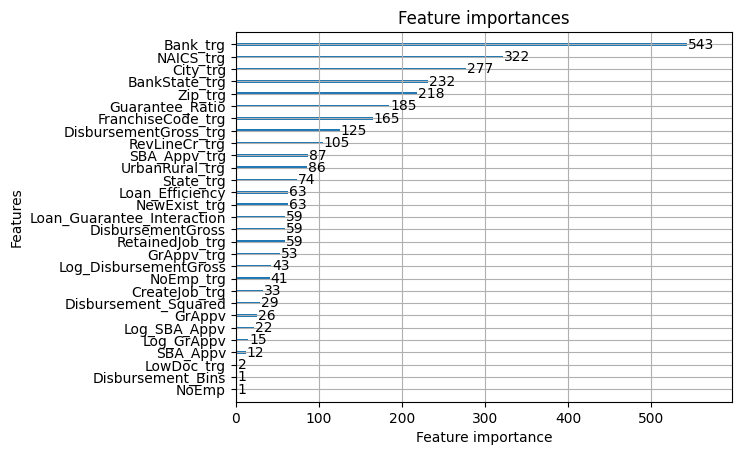

In [24]:
print('Best hyperparameters:', study.best_params)
print('Best AUCPR:', study.best_value)
plt.figure(figsize=(12,6))
lgb.plot_importance(lgb_clf, max_num_features=30)
plt.title("Feature importances")
plt.show()

# Permutation feature by Optuna

As we can see Variable Bank(encoded) is the top most feature, followed by NAICS(encoded) -> Industry type

Then we have Bank State and Zip, both encoded , and then Gaureentee ratio.


In [282]:
optuna.visualization.plot_optimization_history(study)

# Optimization Score History

As we can see the model gets us the best base score value as 0.86

In [258]:
optuna.visualization.plot_slice(study)

In [259]:
optuna.visualization.plot_param_importances(study)

# Hyperparameter Tuning and individual effect
As we can see learning_rate parameter contributes to 48% model tunining
Followed by num_leaves, and then lambda_l2 (Ridge) and rest follow suits

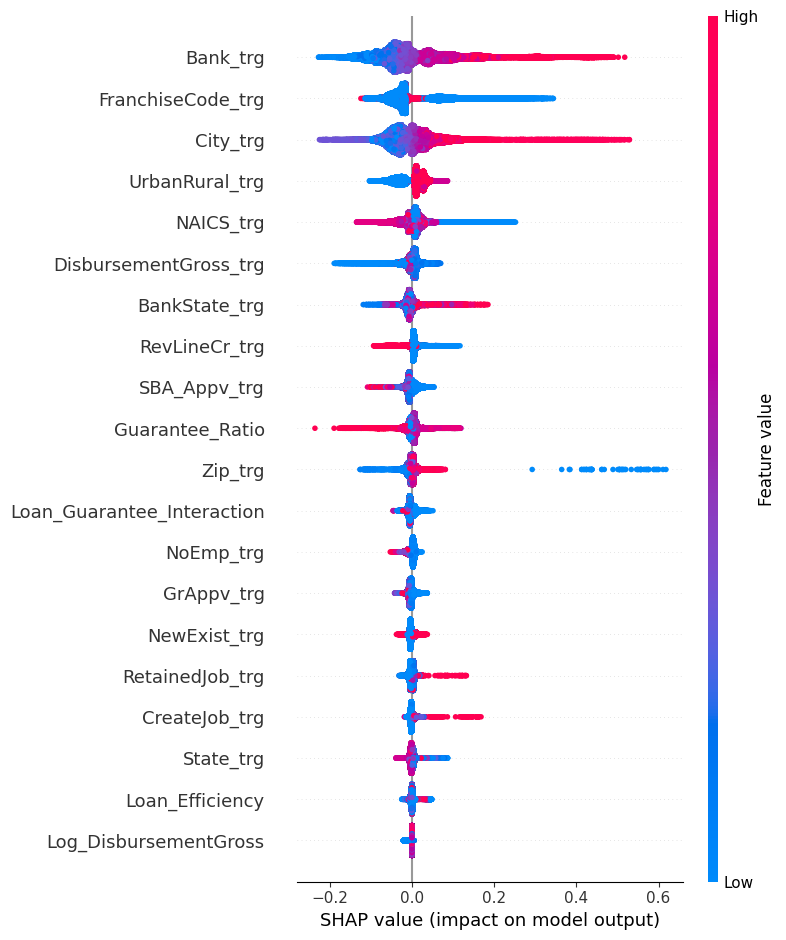

In [260]:
import shap
explainer = shap.TreeExplainer(lgb_clf)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot (for all features)
shap.summary_plot(shap_values, X_test) 
plt.show()

# SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

``` Its a beeswarm plot, for each variable, every instance (i.e. row) of the dataset appears as its own point. The points are distributed along the x-axis according to their SHAP values. In places of high density of SHAP values, they are stacked vertically```

``` Knowing how a variable may influence the model predictions, it can be seen by how the  SHAP values are distributed. The features are ranked from top to bottom by their mean absolute SHAP values for the entire dataset. As we can see the TERM feature is the most important feature according to the SHAP values```

``` Examining the color distribution horizontally along the x-axis for each feature provides insights into general relationship between a variables raw values and its SHAP values ```

As we can see, Bank Shap value for most instances are on the positive side with color red, which means the instances of Bank variable pushes the variable in predicting if a customer will default in a higher degree.

Next, Most important variable seems to be City, with its most average instances pushing the prediction to higher side, that is helping in detecting the city to be a good factor along with other contributions from other feature in detecting whether the customer will default or not

In [261]:
import pickle

# Assuming you have a variable named 'best_params' containing the best hyperparameters
best_params = study.best_params

with open('best_params.pkl', 'wb') as f:
    pickle.dump(best_params, f)

In [262]:
best_params


{'learning_rate': 0.1196259468477466,
 'num_leaves': 250,
 'max_depth': 12,
 'min_data_in_leaf': 200,
 'lambda_l1': 1.7113518271860053,
 'lambda_l2': 0.4446605289083607,
 'bagging_fraction': 0.9,
 'bagging_freq': 5,
 'feature_fraction': 0.9,
 'is_unbalance': True}

In [263]:
print(f"\tBest value (AUC): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

print("Best model best_iteration:", study_model_iteractions[study.best_trial.number])

	Best value (AUC): 0.85987
	Best params:
		learning_rate: 0.1196259468477466
		num_leaves: 250
		max_depth: 12
		min_data_in_leaf: 200
		lambda_l1: 1.7113518271860053
		lambda_l2: 0.4446605289083607
		bagging_fraction: 0.9
		bagging_freq: 5
		feature_fraction: 0.9
		is_unbalance: True
Best model best_iteration: 145.2


In [264]:
best_params = {"verbose": -1,
                "objective":"binary",
                "metric":"auc"
            }
for key,val in study.best_params.items():
    best_params[key] = val

best_params["num_iterations"] = int(study_model_iteractions[study.best_trial.number])
print(best_params)

{'verbose': -1, 'objective': 'binary', 'metric': 'auc', 'learning_rate': 0.1196259468477466, 'num_leaves': 250, 'max_depth': 12, 'min_data_in_leaf': 200, 'lambda_l1': 1.7113518271860053, 'lambda_l2': 0.4446605289083607, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True, 'num_iterations': 145}


# AUCPR Score

In [ ]:
print("AUCPR score on Test dataset:", roc_auc_score(y_test, lgb_clf.predict(X_test)))
print("AUCPR score on Train dataset:", roc_auc_score(y_train, lgb_clf.predict(X_train)))

AUC score on Test dataset: 0.8218313161167985


AUC score on Train dataset: 0.8471117125599129


In [266]:
from sklearn.metrics import f1_score

# Assuming best_lgb is the trained LightGBM model and X_test, y_test are defined

# Get the predicted probabilities for the positive class (class 1)
y_pred_proba = lgb_clf.predict(X_test)

# Set a range of thresholds to test
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

best_f1 = 0
best_threshold = 0

# Find the threshold that maximizes the F1 score
for threshold in thresholds:
    y_pred = (y_pred_proba > threshold).astype(int)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print("Best F1 score:", best_f1)
print("Best threshold:", best_threshold)

Best F1 score: 0.7076118078912634
Best threshold: 0.3


# Confusion matrix

As we can see the data distrubution is imbalanced 

As such, when we calculate f1 and threshold, we use average = "macro"

Also, we can see TN = 117052, TP = 15166, FP = 1510, FN = 12683

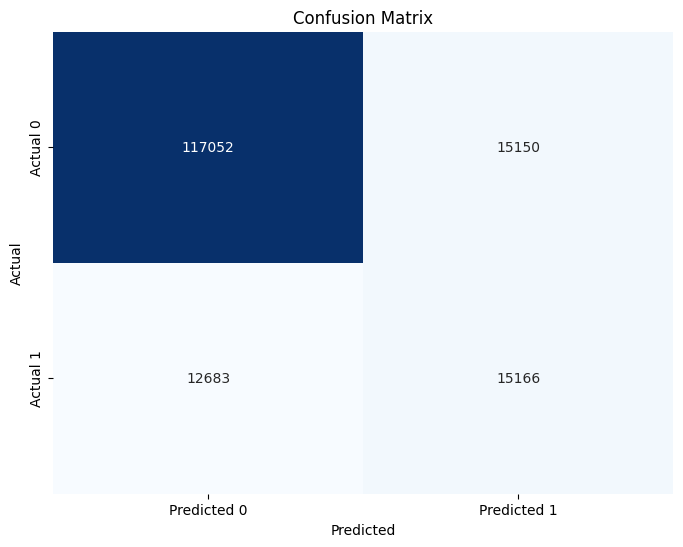

In [267]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Get the predicted probabilities for the positive class (class 1) from the test set
y_pred_proba = lgb_clf.predict(X_test)

# Use the threshold obtained earlier to predict binary labels
threshold = best_threshold
y_pred = (y_pred_proba > threshold).astype(int)

# Construct the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [268]:
import pickle

# Assuming you have a variable named 'best_params' containing the best hyperparameters
best_params = best_params

with open('best_params.pkl', 'wb') as f:
    pickle.dump(best_params, f)

In [269]:
from sklearn.metrics import f1_score
def calculate_optimal_threshold(classifier, X, y):
    y_prob = classifier.predict_proba(X)[:, 1]
    thresholds = np.linspace(0, 1, 100)
    f1_scores = []
    
    for threshold in thresholds:
        y_pred = (y_prob > threshold).astype(int)
        score = f1_score(y, y_pred, average='macro')
        f1_scores.append(score)
    
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    return optimal_threshold

In [270]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
import optuna
from sklearn.model_selection import StratifiedKFold
from optuna.integration import LightGBMPruningCallback
import warnings
import pickle
warnings.filterwarnings("ignore", category=UserWarning)

def train_model(data):

    data.drop(columns="index",inplace=True)
    for i in data['RevLineCr']:
        if i not in ['Y','N']:
            data['RevLineCr'].replace(i,'N',inplace=True)
    for i in data['LowDoc']:
        if i not in ['Y','N']:
            data['LowDoc'].replace(i,'N',inplace=True)
    for i in data['NewExist']:
        if i not in [1,2]:
            data['NewExist'].replace(i,None,inplace=True)

    cat_cols=['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc','NewExist']
    for column in cat_cols:
        data[column]=data[column].fillna(data[column].mode()[0])

    for column in cat_cols:
        data[column]=data[column].fillna(data[column].mode()[0])
    encoder = ce.TargetEncoder(cols=cat_cols)
    encoder.fit(data, data['MIS_Status'])
    data_encoded = encoder.transform(data)
    data_encoded = data_encoded.add_suffix('_trg')
    data_encoded = pd.concat([data_encoded, data], axis=1)
    for column in cat_cols:
        data_encoded[column + "_trg"].fillna(data_encoded[column + "_trg"].mean(), inplace=True)
    data_encoded.drop(columns=cat_cols, inplace=True)
    data_encoded.drop(columns='MIS_Status_trg', inplace=True)


    #Feature Engineering
    data_encoded['Log_DisbursementGross'] = np.log1p(data_encoded['DisbursementGross'])
    data_encoded['Log_NoEmp'] = np.log1p(data_encoded['NoEmp'])
    data_encoded['Log_GrAppv'] = np.log1p(data_encoded['GrAppv'])
    data_encoded['Log_SBA_Appv'] = np.log1p(data_encoded['SBA_Appv'])
    data_encoded['Log_BalanceGross'] = np.log1p(data_encoded['BalanceGross'])

    data_encoded['Disbursement_Bins'] = pd.cut(data_encoded['DisbursementGross'],
                                                bins=[-np.inf, 50000, 150000, np.inf],
                                                labels=['Low', 'Medium', 'High'])
    
    data_encoded['Loan_Efficiency'] = data_encoded['DisbursementGross'] / (data_encoded['CreateJob'] + data_encoded['RetainedJob'] + 1)  # Adding 1 to avoid division by zero

    data_encoded['Guarantee_Ratio'] = data_encoded['SBA_Appv'] / data_encoded['GrAppv']

    data_encoded['Loan_Guarantee_Interaction'] = data_encoded['SBA_Appv'] * data_encoded['GrAppv']

    data_encoded['Disbursement_Squared'] = data_encoded['DisbursementGross'] ** 2

    numerical_columns = [ 'NoEmp', 'CreateJob', 'RetainedJob', 'GrAppv', 'SBA_Appv', 'DisbursementGross', 'BalanceGross', 'Log_DisbursementGross', 'Log_NoEmp', 'Log_GrAppv', 'Log_SBA_Appv', 'Log_BalanceGross', 'Loan_Efficiency', 'Guarantee_Ratio', 'Loan_Guarantee_Interaction', 'Disbursement_Squared']
    scaler = StandardScaler()
    data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])
    for col in data_encoded.columns:
        print(col,":",data_encoded[col].dtype)

    X_train = data_encoded.copy()
    y_train = X_train['MIS_Status']
    X_train.drop(columns=['MIS_Status'], inplace=True)    
    study_model_iteractions = {}
    def objective(trial, X, y):
        param_grid = {
            "num_iterations": 10000,
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, step=0.05),
            "num_leaves": trial.suggest_int("num_leaves", 50, 150, step=5),
            "max_depth": trial.suggest_int("max_depth", 5, 20, step=2),
            "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 100, 1000, step=100),
            'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
            'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
            "bagging_fraction": trial.suggest_float("bagging_fraction", 0.8, 1.0, step=0.1),
            "bagging_freq": trial.suggest_categorical("bagging_freq", [5]),
            "feature_fraction": trial.suggest_float("feature_fraction", 0.8, 1.0, step=0.1),
            "is_unbalance": trial.suggest_categorical("is_unbalance", [True, False]),
            "objective": "binary",
            "metric": "auc",
            "verbose": -1
        }

        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

        cv_scores = np.empty(5)
        cv_iteractions = np.empty(5)
        for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
            X_train, X_valid = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_valid = y.iloc[train_idx], y.iloc[test_idx]

            train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1})
            valid_data = lgb.Dataset(data=X_valid, label=y_valid, params={"verbose":-1})
            lgb_clf = lgb.train(params=param_grid,
                                train_set=train_data,
                                valid_sets=[valid_data],
                                #categorical_feature=categorical_columns,
                                callbacks=[LightGBMPruningCallback(trial, "auc"),
                                            lgb.early_stopping(stopping_rounds=5)]  
                                )
            preds = lgb_clf.predict(X_valid)
            cv_scores[idx] = roc_auc_score(y_valid, preds)
            cv_iteractions[idx] = lgb_clf.best_iteration
        
        study_model_iteractions[trial.number] = np.mean(cv_iteractions)

        return np.mean(cv_scores)

    study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
    func = lambda trial: objective(trial, X_train, y_train)
    study.optimize(func, n_trials=200)
    best_params = study.best_params
    print("Best Parameters:", best_params)

    best_params = study.best_params
    print("Best Parameters:", best_params)

    # Create and train the classifier with the best parameters
    best_classifier = lgb.LGBMClassifier(**best_params)
    best_classifier.fit(X_train, y_train)

    # Now pass this classifier to your function
    optimal_threshold = calculate_optimal_threshold(best_classifier, X_train, y_train)
    print("Optimal Threshold:", optimal_threshold)
    print("Best AUC:", study.best_value)
    

    artifacts_dict ={
        "best_classifier":best_classifier,
        "encoder":encoder,
        "scaler":scaler,
        "optimal_threshold":optimal_threshold,
        "numerical_columns":numerical_columns,
        "cat_cols":cat_cols,
        "columns_to_score":X_train.columns
    }

    artifacts_dict_file = open("D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project2/N/Artifacts/artifacts_dict_file.pkl", "wb")
    #artifacts_dict_file = open("D:/Work/rtifacts/artifacts_dict_file.pkl", "wb")
    pickle.dump(artifacts_dict, artifacts_dict_file)
    artifacts_dict_file.close()
    
    return best_classifier

In [271]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project2/N/SBA_loans_project_2.csv')

X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)
train_model(X_train)

[I 2023-12-10 15:39:12,857] A new study created in memory with name: LGBM Classifier


City_trg : float64
State_trg : float64
Zip_trg : int64
Bank_trg : float64
BankState_trg : float64
NAICS_trg : int64
NoEmp_trg : int64
NewExist_trg : float64
CreateJob_trg : int64
RetainedJob_trg : int64
FranchiseCode_trg : int64
UrbanRural_trg : int64
RevLineCr_trg : float64
LowDoc_trg : float64
DisbursementGross_trg : float64
BalanceGross_trg : float64
GrAppv_trg : float64
SBA_Appv_trg : float64
Zip : int64
NAICS : int64
NoEmp : float64
CreateJob : float64
RetainedJob : float64
FranchiseCode : int64
UrbanRural : int64
DisbursementGross : float64
BalanceGross : float64
GrAppv : float64
SBA_Appv : float64
MIS_Status : int64
Log_DisbursementGross : float64
Log_NoEmp : float64
Log_GrAppv : float64
Log_SBA_Appv : float64
Log_BalanceGross : float64
Disbursement_Bins : category
Loan_Efficiency : float64
Guarantee_Ratio : float64
Loan_Guarantee_Interaction : float64
Disbursement_Squared : float64
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1

[I 2023-12-10 15:39:39,438] Trial 0 finished with value: 0.8574938032821949 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 70, 'max_depth': 9, 'min_data_in_leaf': 400, 'lambda_l1': 2.9353083887863905e-05, 'lambda_l2': 3.5820018022725993e-07, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 0 with value: 0.8574938032821949.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1710]	valid_0's auc: 0.857604
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1730]	valid_0's auc: 0.859649
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1524]	valid_0's auc: 0.859743
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1725]	valid_0's auc: 0.856241
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1505]	valid_0's auc: 0.857416


[I 2023-12-10 15:45:29,536] Trial 1 finished with value: 0.8581306566504482 and parameters: {'learning_rate': 0.01, 'num_leaves': 90, 'max_depth': 13, 'min_data_in_leaf': 1000, 'lambda_l1': 2.1856427030775136e-05, 'lambda_l2': 0.057220481198957736, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8581306566504482.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2603]	valid_0's auc: 0.861079
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2139]	valid_0's auc: 0.862038
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1905]	valid_0's auc: 0.862314
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2249]	valid_0's auc: 0.859472
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2020]	valid_0's auc: 0.86059


[I 2023-12-10 15:52:47,322] Trial 2 finished with value: 0.8610986924753753 and parameters: {'learning_rate': 0.01, 'num_leaves': 130, 'max_depth': 19, 'min_data_in_leaf': 600, 'lambda_l1': 0.00010944343356426067, 'lambda_l2': 0.12505955402633678, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 2 with value: 0.8610986924753753.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[162]	valid_0's auc: 0.857555
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[191]	valid_0's auc: 0.860354
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[165]	valid_0's auc: 0.861044
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[197]	valid_0's auc: 0.858001
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[129]	valid_0's auc: 0.857246


[I 2023-12-10 15:53:12,087] Trial 3 finished with value: 0.8588400259189006 and parameters: {'learning_rate': 0.26, 'num_leaves': 65, 'max_depth': 7, 'min_data_in_leaf': 500, 'lambda_l1': 4.149068464219401e-08, 'lambda_l2': 0.0009013445307319208, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 2 with value: 0.8610986924753753.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[444]	valid_0's auc: 0.85817
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[284]	valid_0's auc: 0.85851
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[361]	valid_0's auc: 0.860271
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[316]	valid_0's auc: 0.855783
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[331]	valid_0's auc: 0.856628


[I 2023-12-10 15:54:07,449] Trial 4 finished with value: 0.8578723332597562 and parameters: {'learning_rate': 0.11, 'num_leaves': 145, 'max_depth': 7, 'min_data_in_leaf': 900, 'lambda_l1': 4.080888642834345, 'lambda_l2': 1.035631392651738e-06, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 2 with value: 0.8610986924753753.
[I 2023-12-10 15:54:08,241] Trial 5 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[101]	valid_0's auc: 0.856701
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[82]	valid_0's auc: 0.858244
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.857765
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.85343
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.856316


[I 2023-12-10 15:54:26,386] Trial 6 finished with value: 0.8564911000721411 and parameters: {'learning_rate': 0.26, 'num_leaves': 95, 'max_depth': 15, 'min_data_in_leaf': 300, 'lambda_l1': 0.09943616199740082, 'lambda_l2': 1.0391368006207105e-08, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 2 with value: 0.8610986924753753.
[I 2023-12-10 15:54:27,247] Trial 7 pruned. Trial was pruned at iteration 3.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 15:54:28,217] Trial 8 pruned. Trial was pruned at iteration 5.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 15:54:29,037] Trial 9 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 15:54:30,292] Trial 10 pruned. Trial was pruned at iteration 12.
[I 2023-12-10 15:54:31,101] Trial 11 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 15:54:31,985] Trial 12 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 15:54:32,771] Trial 13 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 15:54:33,593] Trial 14 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 15:54:34,508] Trial 15 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.856692
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.858974
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[103]	valid_0's auc: 0.860971
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[102]	valid_0's auc: 0.857367
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[79]	valid_0's auc: 0.857517


[I 2023-12-10 15:54:53,306] Trial 16 finished with value: 0.8583042999857561 and parameters: {'learning_rate': 0.26, 'num_leaves': 110, 'max_depth': 13, 'min_data_in_leaf': 400, 'lambda_l1': 3.381680081681634e-05, 'lambda_l2': 0.0007607727079685366, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 2 with value: 0.8610986924753753.
[I 2023-12-10 15:54:54,070] Trial 17 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 15:54:54,870] Trial 18 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 15:54:56,004] Trial 19 pruned. Trial was pruned at iteration 5.
[I 2023-12-10 15:54:56,867] Trial 20 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.856256
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[96]	valid_0's auc: 0.859853
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[78]	valid_0's auc: 0.859693
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.855444
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[91]	valid_0's auc: 0.858411


[I 2023-12-10 15:55:15,590] Trial 21 finished with value: 0.8579315524118231 and parameters: {'learning_rate': 0.26, 'num_leaves': 105, 'max_depth': 13, 'min_data_in_leaf': 400, 'lambda_l1': 4.628869590549069e-05, 'lambda_l2': 0.0008976751132170867, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 2 with value: 0.8610986924753753.
[I 2023-12-10 15:55:16,368] Trial 22 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.856994
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[97]	valid_0's auc: 0.859878
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.859169
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[93]	valid_0's auc: 0.856925
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[82]	valid_0's auc: 0.857507


[I 2023-12-10 15:55:37,249] Trial 23 finished with value: 0.8580946430331042 and parameters: {'learning_rate': 0.26, 'num_leaves': 120, 'max_depth': 13, 'min_data_in_leaf': 300, 'lambda_l1': 8.047880047335603e-06, 'lambda_l2': 0.0005472621685439033, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 2 with value: 0.8610986924753753.
[I 2023-12-10 15:55:38,126] Trial 24 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 15:55:38,981] Trial 25 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[119]	valid_0's auc: 0.859378
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[124]	valid_0's auc: 0.861549
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[96]	valid_0's auc: 0.860801
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[149]	valid_0's auc: 0.858617
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[127]	valid_0's auc: 0.859165


[I 2023-12-10 15:56:07,349] Trial 26 finished with value: 0.8599020813840597 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 135, 'max_depth': 15, 'min_data_in_leaf': 500, 'lambda_l1': 0.0040539238301113955, 'lambda_l2': 0.006978240595195173, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 2 with value: 0.8610986924753753.
[I 2023-12-10 15:56:08,135] Trial 27 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 15:56:08,970] Trial 28 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[91]	valid_0's auc: 0.858152
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[97]	valid_0's auc: 0.859838
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[100]	valid_0's auc: 0.860969
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[102]	valid_0's auc: 0.857643
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[98]	valid_0's auc: 0.85881


[I 2023-12-10 15:56:34,751] Trial 29 finished with value: 0.8590823618264114 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 150, 'max_depth': 19, 'min_data_in_leaf': 500, 'lambda_l1': 0.00023321344648653824, 'lambda_l2': 0.07357451766670912, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 2 with value: 0.8610986924753753.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 15:56:35,967] Trial 30 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[87]	valid_0's auc: 0.858616
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[99]	valid_0's auc: 0.860957
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[86]	valid_0's auc: 0.860913
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[110]	valid_0's auc: 0.857785
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[86]	valid_0's auc: 0.857954


[I 2023-12-10 15:57:00,560] Trial 31 finished with value: 0.8592448580127806 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 140, 'max_depth': 17, 'min_data_in_leaf': 500, 'lambda_l1': 0.0018278855531159, 'lambda_l2': 0.06750566179110098, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 2 with value: 0.8610986924753753.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[99]	valid_0's auc: 0.858718
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.859636
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[82]	valid_0's auc: 0.860771
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[104]	valid_0's auc: 0.858039
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[94]	valid_0's auc: 0.858654


[I 2023-12-10 15:57:24,516] Trial 32 finished with value: 0.859163599003252 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 140, 'max_depth': 17, 'min_data_in_leaf': 500, 'lambda_l1': 0.001875440039240939, 'lambda_l2': 0.08193347985031525, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 2 with value: 0.8610986924753753.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 15:57:29,288] Trial 33 pruned. Trial was pruned at iteration 98.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 15:57:30,434] Trial 34 pruned. Trial was pruned at iteration 7.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 15:57:33,959] Trial 35 pruned. Trial was pruned at iteration 54.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 15:57:35,137] Trial 36 pruned. Trial was pruned at iteration 7.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 15:57:36,210] Trial 37 pruned. Trial was pruned at iteration 4.
[I 2023-12-10 15:57:37,081] Trial 38 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 15:57:38,282] Trial 39 pruned. Trial was pruned at iteration 7.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 15:57:39,405] Trial 40 pruned. Trial was pruned at iteration 7.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 15:57:43,153] Trial 41 pruned. Trial was pruned at iteration 68.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.858604
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[106]	valid_0's auc: 0.860768
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.859503
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[89]	valid_0's auc: 0.857199
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[103]	valid_0's auc: 0.858711


[I 2023-12-10 15:58:07,703] Trial 42 finished with value: 0.8589569228941251 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 150, 'max_depth': 19, 'min_data_in_leaf': 500, 'lambda_l1': 0.0007766601294337843, 'lambda_l2': 0.07698081951802467, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 2 with value: 0.8610986924753753.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 15:58:12,114] Trial 43 pruned. Trial was pruned at iteration 97.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 15:58:13,407] Trial 44 pruned. Trial was pruned at iteration 7.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[90]	valid_0's auc: 0.858609
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[97]	valid_0's auc: 0.860409
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.860911
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.857477
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[93]	valid_0's auc: 0.8583


[I 2023-12-10 15:58:37,332] Trial 45 finished with value: 0.8591413393767734 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 135, 'max_depth': 19, 'min_data_in_leaf': 500, 'lambda_l1': 0.04595203896596367, 'lambda_l2': 0.006284304840595363, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 2 with value: 0.8610986924753753.
[I 2023-12-10 15:58:38,292] Trial 46 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 15:58:42,074] Trial 47 pruned. Trial was pruned at iteration 70.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 15:58:43,219] Trial 48 pruned. Trial was pruned at iteration 5.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 15:58:44,316] Trial 49 pruned. Trial was pruned at iteration 4.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 15:58:45,627] Trial 50 pruned. Trial was pruned at iteration 9.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 15:58:50,329] Trial 51 pruned. Trial was pruned at iteration 98.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 15:58:54,190] Trial 52 pruned. Trial was pruned at iteration 74.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[79]	valid_0's auc: 0.85814
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.858864
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[91]	valid_0's auc: 0.860952
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[80]	valid_0's auc: 0.856808
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.857588


[I 2023-12-10 15:59:14,450] Trial 53 finished with value: 0.8584701854545982 and parameters: {'learning_rate': 0.26, 'num_leaves': 140, 'max_depth': 17, 'min_data_in_leaf': 400, 'lambda_l1': 0.0006293126771306335, 'lambda_l2': 0.30930151824432245, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 2 with value: 0.8610986924753753.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 15:59:15,612] Trial 54 pruned. Trial was pruned at iteration 9.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 15:59:16,704] Trial 55 pruned. Trial was pruned at iteration 6.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 15:59:20,229] Trial 56 pruned. Trial was pruned at iteration 70.
[I 2023-12-10 15:59:21,159] Trial 57 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.858151
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[102]	valid_0's auc: 0.860839
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[97]	valid_0's auc: 0.861431
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[86]	valid_0's auc: 0.857604
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[95]	valid_0's auc: 0.858953


[I 2023-12-10 15:59:49,681] Trial 58 finished with value: 0.8593957936780352 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 150, 'max_depth': 15, 'min_data_in_leaf': 300, 'lambda_l1': 0.17943498756299242, 'lambda_l2': 0.2597576473467667, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 2 with value: 0.8610986924753753.
[I 2023-12-10 15:59:50,635] Trial 59 pruned. Trial was pruned at iteration 3.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 15:59:51,587] Trial 60 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[88]	valid_0's auc: 0.858903
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[86]	valid_0's auc: 0.86061
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[71]	valid_0's auc: 0.860485
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:00:09,750] Trial 61 pruned. Trial was pruned at iteration 96.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:00:12,341] Trial 62 pruned. Trial was pruned at iteration 36.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:00:15,386] Trial 63 pruned. Trial was pruned at iteration 49.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:00:18,324] Trial 64 pruned. Trial was pruned at iteration 50.
[I 2023-12-10 16:00:19,282] Trial 65 pruned. Trial was pruned at iteration 3.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:00:20,323] Trial 66 pruned. Trial was pruned at iteration 4.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:00:21,518] Trial 67 pruned. Trial was pruned at iteration 6.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:00:25,079] Trial 68 pruned. Trial was pruned at iteration 68.
[I 2023-12-10 16:00:25,968] Trial 69 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:00:27,348] Trial 70 pruned. Trial was pruned at iteration 9.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:00:31,478] Trial 71 pruned. Trial was pruned at iteration 68.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:00:32,900] Trial 72 pruned. Trial was pruned at iteration 13.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:00:34,445] Trial 73 pruned. Trial was pruned at iteration 15.
[I 2023-12-10 16:00:35,376] Trial 74 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:00:36,568] Trial 75 pruned. Trial was pruned at iteration 6.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:00:37,847] Trial 76 pruned. Trial was pruned at iteration 4.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.857161
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[84]	valid_0's auc: 0.859405
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.860813
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[93]	valid_0's auc: 0.856702
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[65]	valid_0's auc: 0.857647


[I 2023-12-10 16:01:00,550] Trial 77 finished with value: 0.8583455909948775 and parameters: {'learning_rate': 0.26, 'num_leaves': 150, 'max_depth': 19, 'min_data_in_leaf': 400, 'lambda_l1': 0.0003643012757805105, 'lambda_l2': 1.0390059742283513, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 2 with value: 0.8610986924753753.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:01:01,644] Trial 78 pruned. Trial was pruned at iteration 7.
[I 2023-12-10 16:01:02,512] Trial 79 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:01:03,385] Trial 80 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:01:04,141] Trial 81 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:01:05,035] Trial 82 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:01:05,888] Trial 83 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:01:06,668] Trial 84 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:01:07,447] Trial 85 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:01:08,353] Trial 86 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:01:09,160] Trial 87 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:01:09,973] Trial 88 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:01:10,834] Trial 89 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:01:11,619] Trial 90 pruned. Trial was pruned at

Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:01:14,591] Trial 91 pruned. Trial was pruned at iteration 52.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:01:17,443] Trial 92 pruned. Trial was pruned at iteration 50.
[I 2023-12-10 16:01:18,208] Trial 93 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:01:19,076] Trial 94 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:01:22,778] Trial 95 pruned. Trial was pruned at iteration 73.
[I 2023-12-10 16:01:23,630] Trial 96 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:01:26,888] Trial 97 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:01:28,558] Trial 98 pruned. Trial was pruned at iteration 15.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:01:32,024] Trial 99 pruned. Trial was pruned at iteration 48.
[I 2023-12-10 16:01:32,968] Trial 100 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:01:37,539] Trial 101 pruned. Trial was pruned at iteration 98.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:01:40,503] Trial 102 pruned. Trial was pruned at iteration 52.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:01:44,518] Trial 103 pruned. Trial was pruned at iteration 68.
[I 2023-12-10 16:01:45,394] Trial 104 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:01:49,459] Trial 105 pruned. Trial was pruned at iteration 68.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:01:50,681] Trial 106 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:01:53,583] Trial 107 pruned. Trial was pruned at iteration 50.
[I 2023-12-10 16:01:54,372] Trial 108 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:01:59,319] Trial 109 pruned. Trial was pruned at iteration 98.
[I 2023-12-10 16:02:00,183] Trial 110 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:02:01,006] Trial 111 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:02:01,874] Trial 112 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:02:02,652] Trial 113 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:02:03,430] Trial 114 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:02:04,303] Trial 115 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:02:07,869] Trial 116 pruned. Trial was pruned at iteration 70.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:02:09,148] Trial 117 pruned. Trial was pruned at iteration 7.
[I 2023-12-10 16:02:09,972] Trial 118 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:02:11,127] Trial 119 pruned. Trial was pruned at iteration 8.
[I 2023-12-10 16:02:11,987] Trial 120 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:02:12,800] Trial 121 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:02:13,626] Trial 122 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:02:14,506] Trial 123 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:02:15,302] Trial 124 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:02:16,151] Trial 125 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:02:17,022] Trial 126 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:02:18,218] Trial 127 pruned. Trial was pruned at iteration 4.
[I 2023-12-10 16:02:19,151] Trial 128 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:02:20,301] Trial 129 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:02:21,231] Trial 130 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:02:22,107] Trial 131 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:02:23,042] Trial 132 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:02:23,932] Trial 133 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:02:24,734] Trial 134 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[96]	valid_0's auc: 0.859522
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.860147
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[67]	valid_0's auc: 0.860893
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.856252
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.857638


[I 2023-12-10 16:02:44,756] Trial 135 finished with value: 0.8588905632842163 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 135, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 4.656334582658035e-06, 'lambda_l2': 0.00017997907921565536, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 2 with value: 0.8610986924753753.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[96]	valid_0's auc: 0.859519
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.860147
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[67]	valid_0's auc: 0.860893
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.856252
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.857638


[I 2023-12-10 16:03:04,057] Trial 136 finished with value: 0.8588899069030649 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 135, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 4.4399378541566875e-06, 'lambda_l2': 0.00012695544837547967, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 2 with value: 0.8610986924753753.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[96]	valid_0's auc: 0.859518
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.860147
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[67]	valid_0's auc: 0.860893
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.856252
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.857638


[I 2023-12-10 16:03:25,126] Trial 137 finished with value: 0.8588897449585016 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 135, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 1.0467420651138614e-06, 'lambda_l2': 0.00010575141265669199, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 2 with value: 0.8610986924753753.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[96]	valid_0's auc: 0.859522
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.860147
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[67]	valid_0's auc: 0.860893
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.856252
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.857638


[I 2023-12-10 16:03:45,142] Trial 138 finished with value: 0.858890564380693 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 135, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 7.520105248537147e-06, 'lambda_l2': 0.0001324859351322011, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 2 with value: 0.8610986924753753.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[96]	valid_0's auc: 0.859519
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.860147
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[67]	valid_0's auc: 0.860893
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.856252
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.857638


[I 2023-12-10 16:04:05,524] Trial 139 finished with value: 0.8588898854791498 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 135, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 3.2289732563379106e-06, 'lambda_l2': 9.929659904141721e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 2 with value: 0.8610986924753753.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:04:09,972] Trial 140 pruned. Trial was pruned at iteration 92.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:04:13,071] Trial 141 pruned. Trial was pruned at iteration 49.
[I 2023-12-10 16:04:14,042] Trial 142 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:04:18,006] Trial 143 pruned. Trial was pruned at iteration 92.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[96]	valid_0's auc: 0.859521
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.860147
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[67]	valid_0's auc: 0.860893
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.856252
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.857638


[I 2023-12-10 16:04:37,148] Trial 144 finished with value: 0.858890439379886 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 135, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 2.200367353592363e-06, 'lambda_l2': 0.00014652746167102533, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 2 with value: 0.8610986924753753.
[I 2023-12-10 16:04:37,998] Trial 145 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[96]	valid_0's auc: 0.859521
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.860147
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[67]	valid_0's auc: 0.860893
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.856252
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.857638


[I 2023-12-10 16:04:57,722] Trial 146 finished with value: 0.8588903865791646 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 135, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 3.3914479617905795e-06, 'lambda_l2': 0.0001547476129869389, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 2 with value: 0.8610986924753753.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[96]	valid_0's auc: 0.859521
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.860147
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[67]	valid_0's auc: 0.860893
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.856252
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.857638


[I 2023-12-10 16:05:17,131] Trial 147 finished with value: 0.8588904117144228 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 135, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 4.056276941735395e-06, 'lambda_l2': 0.0001429492036337166, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 2 with value: 0.8610986924753753.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:05:20,254] Trial 148 pruned. Trial was pruned at iteration 60.
[I 2023-12-10 16:05:21,122] Trial 149 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:05:23,433] Trial 150 pruned. Trial was pruned at iteration 34.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:05:27,344] Trial 151 pruned. Trial was pruned at iteration 84.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:05:31,157] Trial 152 pruned. Trial was pruned at iteration 84.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.858494
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[84]	valid_0's auc: 0.860853
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[98]	valid_0's auc: 0.861718
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[92]	valid_0's auc: 0.857711
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[93]	valid_0's auc: 0.858097


[I 2023-12-10 16:05:53,188] Trial 153 finished with value: 0.8593747087108392 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 140, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 8.576832231559103e-07, 'lambda_l2': 2.763830011421589e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 2 with value: 0.8610986924753753.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:05:56,687] Trial 154 pruned. Trial was pruned at iteration 72.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:06:00,237] Trial 155 pruned. Trial was pruned at iteration 72.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:06:01,720] Trial 156 pruned. Trial was pruned at iteration 14.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.858494
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[84]	valid_0's auc: 0.860854
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[98]	valid_0's auc: 0.861718
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[92]	valid_0's auc: 0.857711
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[93]	valid_0's auc: 0.858097


[I 2023-12-10 16:06:23,914] Trial 157 finished with value: 0.8593747979490324 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 140, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 8.483450745183847e-07, 'lambda_l2': 1.609137278690292e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 2 with value: 0.8610986924753753.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.858494
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[84]	valid_0's auc: 0.860853
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[98]	valid_0's auc: 0.861718
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[92]	valid_0's auc: 0.857711
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[93]	valid_0's auc: 0.858097


[I 2023-12-10 16:06:46,397] Trial 158 finished with value: 0.8593745854820707 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 140, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 7.925544104811537e-07, 'lambda_l2': 2.089840003563253e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 2 with value: 0.8610986924753753.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.858494
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[84]	valid_0's auc: 0.860854
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[98]	valid_0's auc: 0.861718
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[92]	valid_0's auc: 0.857711
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[93]	valid_0's auc: 0.858097


[I 2023-12-10 16:07:10,346] Trial 159 finished with value: 0.8593747890086781 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 140, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 1.658482512878088e-06, 'lambda_l2': 2.050839846610808e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 2 with value: 0.8610986924753753.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:07:11,849] Trial 160 pruned. Trial was pruned at iteration 17.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:07:13,789] Trial 161 pruned. Trial was pruned at iteration 25.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:07:16,184] Trial 162 pruned. Trial was pruned at iteration 38.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.858494
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[84]	valid_0's auc: 0.860853
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[98]	valid_0's auc: 0.861718
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[92]	valid_0's auc: 0.85771
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[93]	valid_0's auc: 0.858097


[I 2023-12-10 16:07:36,387] Trial 163 finished with value: 0.8593745780645706 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 140, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 2.124976254256362e-06, 'lambda_l2': 1.385108222554207e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 2 with value: 0.8610986924753753.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:07:39,016] Trial 164 pruned. Trial was pruned at iteration 38.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:07:41,062] Trial 165 pruned. Trial was pruned at iteration 23.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.858494
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[84]	valid_0's auc: 0.860853
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[98]	valid_0's auc: 0.861718
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[92]	valid_0's auc: 0.85771
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[93]	valid_0's auc: 0.858097


[I 2023-12-10 16:08:01,498] Trial 166 finished with value: 0.8593745631348115 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 140, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 1.1311319972530307e-06, 'lambda_l2': 2.1826275422076487e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 2 with value: 0.8610986924753753.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:08:02,845] Trial 167 pruned. Trial was pruned at iteration 11.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.858494
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[84]	valid_0's auc: 0.860854
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[98]	valid_0's auc: 0.861718
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[92]	valid_0's auc: 0.857711
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[93]	valid_0's auc: 0.858097


[I 2023-12-10 16:08:25,221] Trial 168 finished with value: 0.8593747248213154 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 140, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 1.2267424497356758e-06, 'lambda_l2': 1.9533955676459814e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 2 with value: 0.8610986924753753.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.858494
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[84]	valid_0's auc: 0.860853
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[98]	valid_0's auc: 0.861718
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[92]	valid_0's auc: 0.857711
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[93]	valid_0's auc: 0.858097


[I 2023-12-10 16:08:47,032] Trial 169 finished with value: 0.8593747087108646 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 140, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 1.0181087451851477e-06, 'lambda_l2': 1.8672556437074782e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 2 with value: 0.8610986924753753.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.858494
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[84]	valid_0's auc: 0.860854
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[98]	valid_0's auc: 0.861718
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[92]	valid_0's auc: 0.857711
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[93]	valid_0's auc: 0.858097


[I 2023-12-10 16:09:09,579] Trial 170 finished with value: 0.8593748170095195 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 140, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 8.527688607256073e-07, 'lambda_l2': 2.2565703072189496e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 2 with value: 0.8610986924753753.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.858494
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[84]	valid_0's auc: 0.860854
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[98]	valid_0's auc: 0.861718
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[92]	valid_0's auc: 0.85771
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[93]	valid_0's auc: 0.858097


[I 2023-12-10 16:09:31,365] Trial 171 finished with value: 0.8593745242517411 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 140, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 7.950853774699966e-07, 'lambda_l2': 1.563927969344161e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 2 with value: 0.8610986924753753.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:09:32,559] Trial 172 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:09:36,076] Trial 173 pruned. Trial was pruned at iteration 72.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:09:37,428] Trial 174 pruned. Trial was pruned at iteration 10.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:09:39,965] Trial 175 pruned. Trial was pruned at iteration 33.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:09:41,513] Trial 176 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:09:42,902] Trial 177 pruned. Trial was pruned at iteration 8.
[I 2023-12-10 16:09:43,893] Trial 178 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:09:45,321] Trial 179 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:09:46,846] Trial 180 pruned. Trial was pruned at iteration 10.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:09:49,241] Trial 181 pruned. Trial was pruned at iteration 27.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:09:50,849] Trial 182 pruned. Trial was pruned at iteration 14.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:09:52,174] Trial 183 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:09:53,411] Trial 184 pruned. Trial was pruned at iteration 7.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:09:54,569] Trial 185 pruned. Trial was pruned at iteration 5.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:09:56,035] Trial 186 pruned. Trial was pruned at iteration 11.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:09:57,312] Trial 187 pruned. Trial was pruned at iteration 8.
[I 2023-12-10 16:09:58,302] Trial 188 pruned. Trial was pruned at iteration 3.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:09:59,125] Trial 189 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:10:00,236] Trial 190 pruned. Trial was pruned at iteration 5.
[I 2023-12-10 16:10:01,130] Trial 191 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 16:10:02,153] Trial 192 pruned. Trial was pruned at iteration 4.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:10:03,390] Trial 193 pruned. Trial was pruned at iteration 5.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:10:04,686] Trial 194 pruned. Trial was pruned at iteration 7.
[I 2023-12-10 16:10:05,514] Trial 195 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:10:09,286] Trial 196 pruned. Trial was pruned at iteration 79.
[I 2023-12-10 16:10:10,105] Trial 197 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:10:11,372] Trial 198 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 16:10:12,734] Trial 199 pruned. Trial was pruned at iteration 11.


Best Parameters: {'learning_rate': 0.01, 'num_leaves': 130, 'max_depth': 19, 'min_data_in_leaf': 600, 'lambda_l1': 0.00010944343356426067, 'lambda_l2': 0.12505955402633678, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}
Best Parameters: {'learning_rate': 0.01, 'num_leaves': 130, 'max_depth': 19, 'min_data_in_leaf': 600, 'lambda_l1': 0.00010944343356426067, 'lambda_l2': 0.12505955402633678, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}
[LightGBM] [Warning] min_data_in_leaf is set=600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=600
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0.00010944343356426067, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010944343356426067
[LightGBM] [Warning] lambda_l2 is set=0.12505955402633678, reg_lambda=0.0 will be

LGBMClassifier(bagging_fraction=1.0, bagging_freq=5, feature_fraction=1.0,
               is_unbalance=False, lambda_l1=0.00010944343356426067,
               lambda_l2=0.12505955402633678, learning_rate=0.01, max_depth=19,
               min_data_in_leaf=600, num_leaves=130)

In [272]:
import shap
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
def examine_indiv_reason_codes(df_vals_and_cotribs,
                               rec_num, 
                               include_columns, 
                               contrib_columns,
                               use_matplotlib=False):
    
    shap_columns = contrib_columns.copy()
    shap_columns.remove("BiasTerm")
    ftr_columns = include_columns.copy()
    bias = df_vals_and_cotribs['BiasTerm'].iloc[rec_num]
    shap_contribs = df_vals_and_cotribs[shap_columns].iloc[rec_num,:].values
    ftr_values =    df_vals_and_cotribs[ftr_columns].iloc[rec_num,:].values
    
    shap_plot= shap.force_plot(bias, 
                           shap_contribs, 
                           ftr_values, 
                           shap_columns,
                           link="identity",
                           matplotlib=use_matplotlib)
    plt.show()

    # return shap.force_plot(bias, 
    #                     shap_contribs, 
    #                     ftr_values, 
    #                     shap_columns,
    #                     link="logit",
    #                     matplotlib=use_matplotlib)

In [273]:
from matplotlib import pyplot as plt
import shap
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore", category=Warning)

def scoring(data):
    """
    Function to score input dataset.
    
    Input: dataset in Pandas DataFrame format
    Output: Python list of labels in the same order as input records
    
    Flow:
        - Load artifacts
        - Transform dataset
        - Score dataset
        - Return labels
    
    """
    artifacts_dict_file =  open("D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project2/artifacts/artifacts_dict_file.pkl", "rb")
    artifacts_dict = pickle.load(file=artifacts_dict_file)
    artifacts_dict_file.close()
    best_classifier = artifacts_dict["best_classifier"]
    encoder = artifacts_dict["encoder"]
    scaler = artifacts_dict["scaler"]
    threshold = artifacts_dict["optimal_threshold"]
    numerical_columns = artifacts_dict["numerical_columns"]
    cat_cols = artifacts_dict["cat_cols"]
    columns_to_score = artifacts_dict["columns_to_score"]

    for i in data['RevLineCr']:
        if i not in ['Y','N']:
            data['RevLineCr'].replace(i,'N',inplace=True)
    for i in data['LowDoc']:
        if i not in ['Y','N']:
            data['LowDoc'].replace(i,'N',inplace=True)
    for i in data['NewExist']:
        if i not in [1,2]:
            data['NewExist'].replace(i,None,inplace=True)
    
    for column in cat_cols:
        data[column]=data[column].fillna(data[column].mode()[0])
    
    data_encoded = encoder.transform(data.drop(columns=['MIS_Status']))
    data_encoded = data_encoded.add_suffix('_trg')
    data_encoded = pd.concat([data_encoded, data], axis=1)
    for column in cat_cols:
        data_encoded[column + "_trg"].fillna(data_encoded[column + "_trg"].mean(), inplace=True)
    data_encoded.drop(columns=cat_cols, inplace=True)

    data_encoded['Log_DisbursementGross'] = np.log1p(data_encoded['DisbursementGross'])
    data_encoded['Log_NoEmp'] = np.log1p(data_encoded['NoEmp'])
    data_encoded['Log_GrAppv'] = np.log1p(data_encoded['GrAppv'])
    data_encoded['Log_SBA_Appv'] = np.log1p(data_encoded['SBA_Appv'])
    data_encoded['Log_BalanceGross'] = np.log1p(data_encoded['BalanceGross'])

    data_encoded['Disbursement_Bins'] = pd.cut(data_encoded['DisbursementGross'],
                                                bins=[-np.inf, 50000, 150000, np.inf],
                                                labels=['Low', 'Medium', 'High'])
    
    data_encoded['Loan_Efficiency'] = data_encoded['DisbursementGross'] / (data_encoded['CreateJob'] + data_encoded['RetainedJob'] + 1)  # Adding 1 to avoid division by zero

    data_encoded['Guarantee_Ratio'] = data_encoded['SBA_Appv'] / data_encoded['GrAppv']

    data_encoded['Loan_Guarantee_Interaction'] = data_encoded['SBA_Appv'] * data_encoded['GrAppv']

    data_encoded['Disbursement_Squared'] = data_encoded['DisbursementGross'] ** 2

    data_encoded[numerical_columns] = scaler.transform(data_encoded[numerical_columns])

    y_prob = best_classifier.predict_proba(data_encoded[columns_to_score])
    y_pred = (y_prob[:,0] < threshold).astype(int)
    d = {
        "index" : data_encoded.index,
        "label" : y_pred,
        "probability_0": y_prob[:,0],
        "probability_1": y_prob[:,1]
    }
    #metric to report and optimize for AUC
    print("\n\nAUC score on Test dataset:", roc_auc_score(data['MIS_Status'], y_prob[:,1]))
    print("\nConfusion Matrix:\n", confusion_matrix(data['MIS_Status'], y_pred))

    # #plotting global feature importance
    # fig, ax = plt.subplots(figsize=(10, 10))
    # lgb.plot_importance(best_classifier, ax=ax, max_num_features=30)
    # plt.show()
    

    # #shap plots
    # explainer = shap.TreeExplainer(best_classifier)
    # shap_values = explainer.shap_values(data_encoded[columns_to_score])
    # shap.summary_plot(shap_values, data_encoded[columns_to_score])
    # plt.show()

    # #plotting permutation feature importance
    # result = permutation_importance(best_classifier, data_encoded[columns_to_score], data['MIS_Status'], n_repeats=10, random_state=42, n_jobs=2)
    # sorted_idx = result.importances_mean.argsort()
    # fig, ax = plt.subplots()
    # ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=data_encoded[columns_to_score].columns[sorted_idx])
    # ax.set_title("Permutation Importances (test set)")
    # fig.tight_layout()
    # plt.show()
    

    #add columns to data_encoded
    data_encoded['label'] = y_pred
    data_encoded['probability_0'] = y_prob[:,0]
    data_encoded['probability_1'] = y_prob[:,1]
    
    #residual analysis
    data_encoded['residual'] = data_encoded['label'] - data['MIS_Status']
    misclassified = data_encoded[data_encoded['residual'] != 0]
    

    #get 2 records where
    #Label `0` is correctly identified significantly high probability
    correctly_identified_0 = data_encoded[(data_encoded['residual'] == 0) & (data_encoded['label'] == 0)].sort_values(by='probability_0', ascending=False).head(2)
    #Label `1` is correctly identified significantly high probability
    correctly_identified_1 = data_encoded[(data_encoded['residual'] == 0) & (data_encoded['label'] == 1)].sort_values(by='probability_1', ascending=False).head(2)
    #Label `0` is incorrectly identified significantly high probability
    incorrectly_identified_0 = data_encoded[(data_encoded['residual'] != 0) & (data_encoded['label'] == 0)].sort_values(by='probability_0', ascending=False).head(2)
    #Label `1` is incorrectly identified significantly high probability
    incorrectly_identified_1 = data_encoded[(data_encoded['residual'] != 0) & (data_encoded['label'] == 1)].sort_values(by='probability_1', ascending=False).head(2)

    
    
    pred_contributions_orig_table = best_classifier.predict(data_encoded[columns_to_score], pred_contrib=True)
    pred_contributions_orig_table = pd.DataFrame(pred_contributions_orig_table)
    
    contrib_columns =[]
    for col in columns_to_score:
        contrib_columns.append("contrib_"+col)
    
    contrib_columns.append("BiasTerm")
    pred_contributions_orig_table.columns = contrib_columns
    print(pred_contributions_orig_table.shape)
    print(data_encoded.shape)
    include_cols = columns_to_score
    pred_contributions_orig_table.index = data_encoded.index

    #concatenate data_encoded and pred_contributions_orig_table
    test_yhat = pd.concat([data_encoded, pred_contributions_orig_table],axis=1)
    print(test_yhat)

    correctly_identified_0 = test_yhat[(test_yhat['residual'] == 0) & (test_yhat['label'] == 0)].sort_values(by='probability_0', ascending=False).head(2)
    correctly_identified_1 = test_yhat[(test_yhat['residual'] == 0) & (test_yhat['label'] == 1)].sort_values(by='probability_1', ascending=False).head(2)
    incorrectly_identified_0 = test_yhat[(test_yhat['residual'] != 0) & (test_yhat['label'] == 0)].sort_values(by='probability_0', ascending=False).head(2)
    incorrectly_identified_1 = test_yhat[(test_yhat['residual'] != 0) & (test_yhat['label'] == 1)].sort_values(by='probability_1', ascending=False).head(2)
    print(correctly_identified_0)
    examine_indiv_reason_codes(correctly_identified_0, 0, include_cols, contrib_columns, use_matplotlib=True)
    examine_indiv_reason_codes(correctly_identified_0, 1, include_cols, contrib_columns, use_matplotlib=True)
    examine_indiv_reason_codes(correctly_identified_1, 0, include_cols, contrib_columns, use_matplotlib=True)
    examine_indiv_reason_codes(correctly_identified_1, 1, include_cols, contrib_columns, use_matplotlib=True)
    examine_indiv_reason_codes(incorrectly_identified_0, 0, include_cols, contrib_columns, use_matplotlib=True)
    examine_indiv_reason_codes(incorrectly_identified_0, 1, include_cols, contrib_columns, use_matplotlib=True)
    examine_indiv_reason_codes(incorrectly_identified_1, 0, include_cols, contrib_columns, use_matplotlib=True)
    examine_indiv_reason_codes(incorrectly_identified_1, 1, include_cols, contrib_columns, use_matplotlib=True)

    
    

    return pd.DataFrame(d)

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=9.408025110972025, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.408025110972025
[LightGBM] [Warning] lambda_l2 is set=3.9690665922792114e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.9690665922792114e-08
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


AUC score on Test dataset: 0.833374867073196

Confusion Matrix:
 [[78223 53979]
 [ 3553 24296]]
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] feature_fra

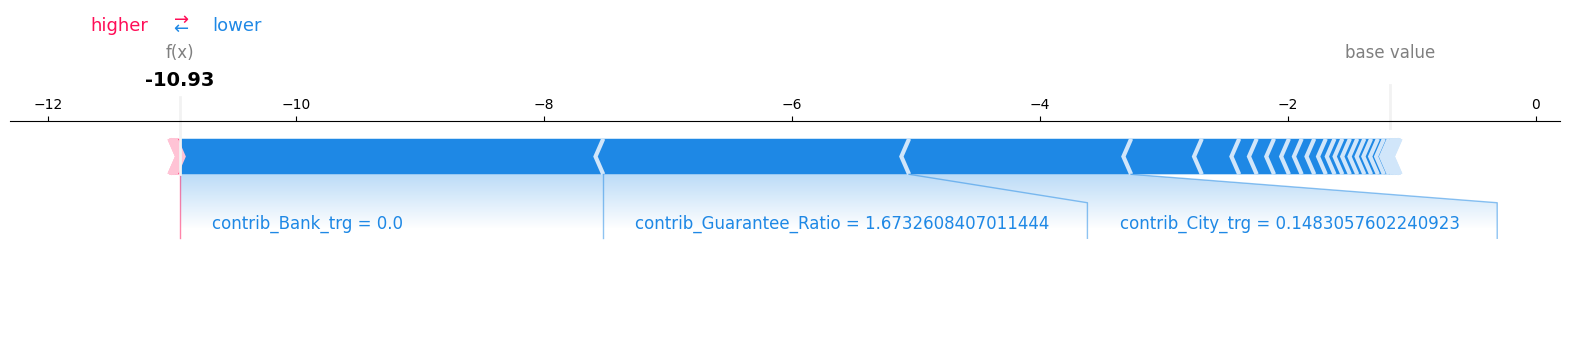

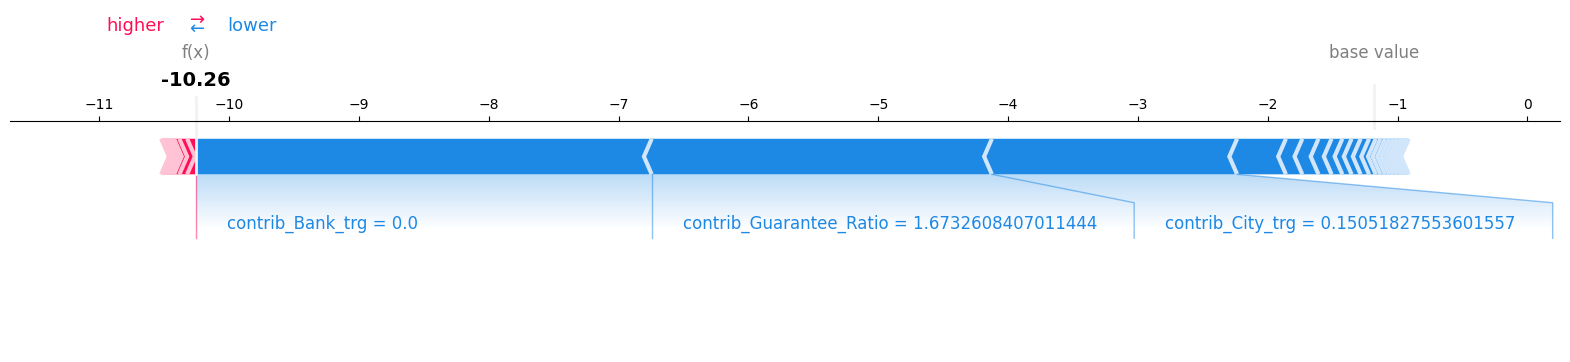

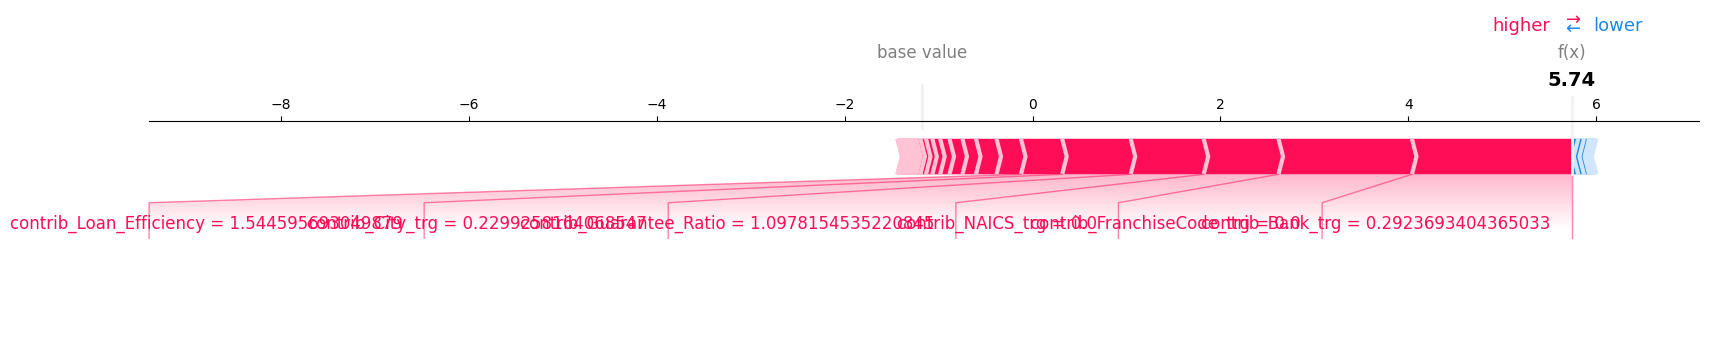

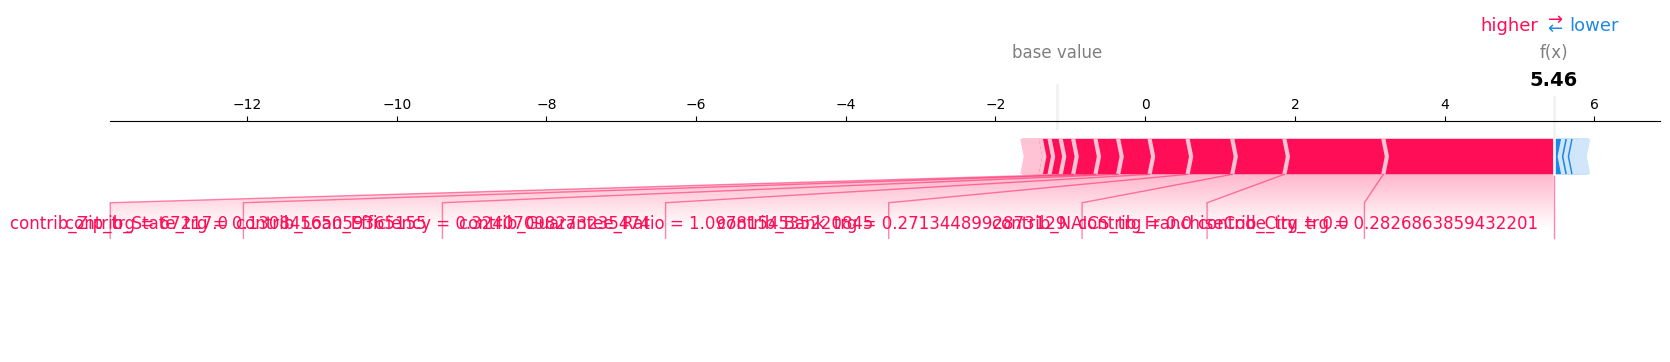

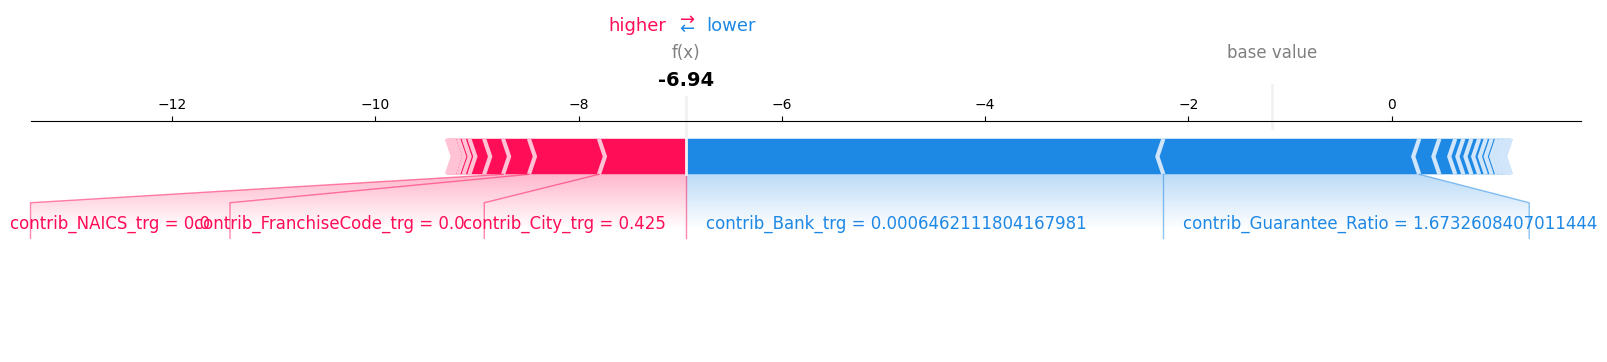

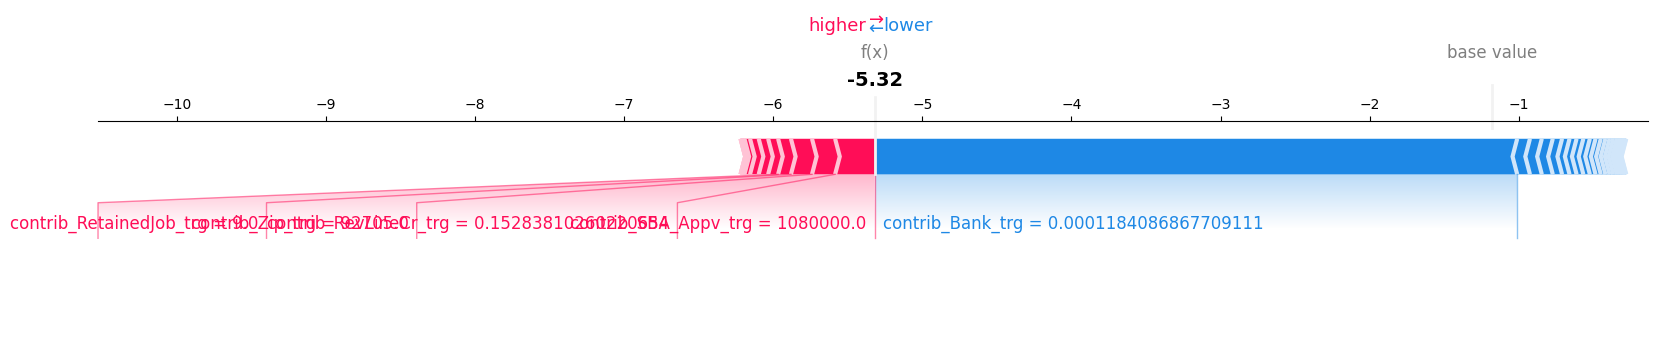

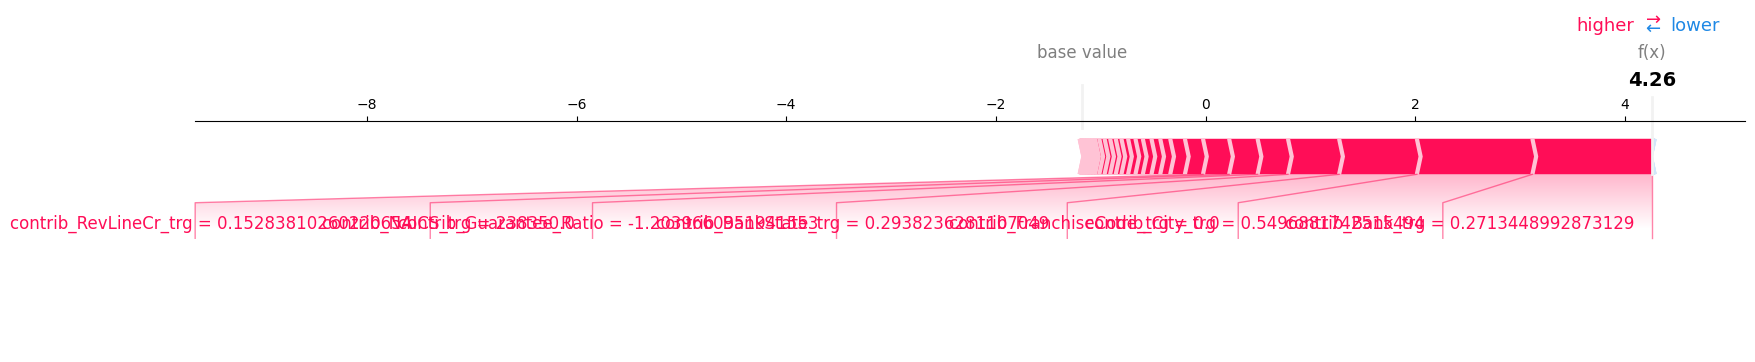

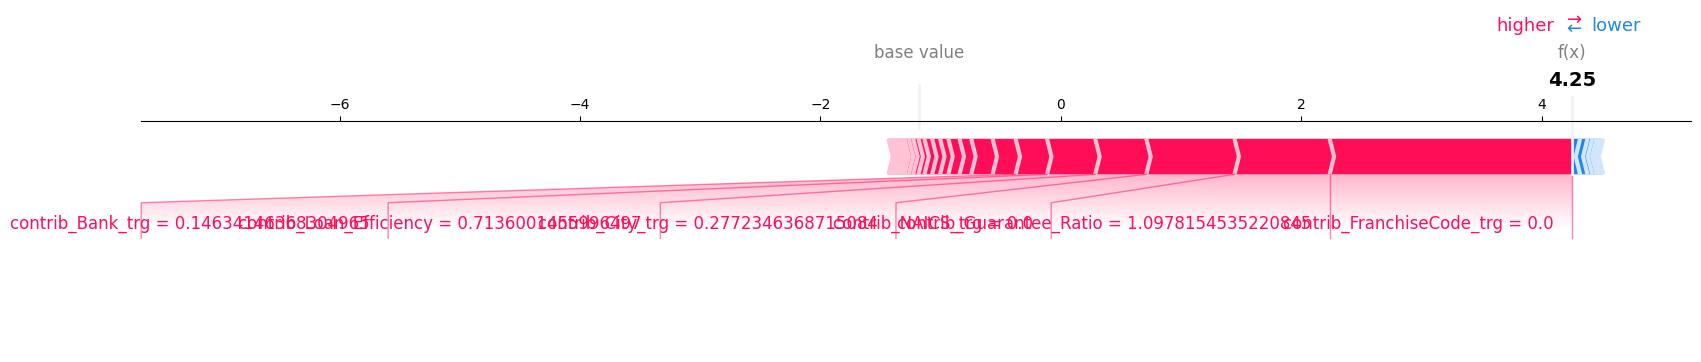

         index  label  probability_0  probability_1
0       384386      0       0.943830       0.056170
1       662652      1       0.542527       0.457473
2       269020      0       0.846271       0.153729
3       752306      0       0.745137       0.254863
4       675193      0       0.999835       0.000165
...        ...    ...            ...            ...
160046   82879      0       0.840566       0.159434
160047  649244      1       0.610946       0.389054
160048  454383      0       0.999605       0.000395
160049  679182      1       0.681184       0.318816
160050  355393      1       0.587844       0.412156

[160051 rows x 4 columns]


In [274]:
print(scoring(X_test))

# Residual Analysis

As we can see, Plot records with largest negative residuals when not defaulted, will push the model predictability to high.
Similarly,  Plot records with largest positive residuals when defaulted and model predicts low probability of default.


# Conclusion

In summary, the developed LightGBM model showcased promising performance and contributed meaningful insights into the customer defaulting on loan or not. Despite certain limitations, the project lays a foundation for future improvements and applications in Default detection

We used in SBA Dataset, with MIS_Status being our predictor variable and other explanatory variables like NoEmp', 'CreateJob', 'RetainedJob', 'GrAppv', 'SBA_Appv', 'DisbursementGross', 'BalanceGross', 'Log_DisbursementGross', 'Log_NoEmp', 'Log_GrAppv', 'Log_SBA_Appv', 'Log_BalanceGross', 'Loan_Efficiency', 'Guarantee_Ratio', 'Loan_Guarantee_Interaction', 'Disbursement_Squared.

We used Target encoding as an encoder for converting categorical variables to numerical variables, followed by Standard scaling to transform features to have a mean of 0 and a standard deviation of 1.

We then committed 10 feature exatraction -> Log_DisbursementGross, Log_NoEmp, Log_GrAppv, Log_SBA_Appv', Log_BalanceGross,Disbursement_Bins, Loan_Efficiency, Guarantee_Ratio', Loan_Guarantee_Interaction, and Disbursement_Square.

Then we used LightGBM Classifier: To use Optuna you first need to create an objective function. This includes a dictionary of the model’s hyperparameters you want to test, as well as the ranges of values you want to cover during testing. Optuna will do a series of runs and test different combinations of hyperparameters by fitting them to your model and then measuring the accuracy (or whatever objective you set) before finally returning the best parameters.

o run the Optuna study and identify the best hyperparameters for our LightGBMClassifier model we need to create a sampler. We’re using TPESampler, which uses the Tree-Structured Parzen Estimator algorithm. We want to maximise the accuracy of our model during tuning, so we’ll pass in the maximize argument to create_study() along with our sampler. We’ll then use optimize() to run 100 trials against our objective function.

To examine the results of our Optuna study we can print some values returned in the study variable. We can see that we ran 200 trials and that trial number 14 generated the best results, with an AUCPR score of  approx 84%. By looping over the trial.params.items() we can see what the winning hyperparameters were and use them in our final tuned model.


# Following observations on hyperparameters were made during training the model:

``` A  common strategy for achieving higher accuracy is to use many decision trees and decrease the learning rate. In other words, find the best combination of n_estimators and learning_rate in LGBM.

n_estimators controls the number of decision trees while learning_rate is the step size parameter of the gradient descent.

Ensembles like LGBM build trees in iterations, and each new tree is used to correct the “errors” of the previous trees. This approach is fast and powerful, and prone to overfitting.

That’s why gradient boosted ensembles have a learning_rate parameter that controls the learning speed. Typical values lie within 0.01 and 0.3, but it is possible to go beyond these, especially towards 0.```

``` 

LGBM also has important regularization parameters.

lambda_l1 and lambda_l2 specifies L1 or L2 regularization, like XGBoost's reg_lambda and reg_alpha. The optimal value for these parameters is harder to tune because their magnitude is not directly correlated with overfitting. However, a good search range is (0, 100) for both.

LGBM also has important regularization parameters.

lambda_l1 and lambda_l2 specifies L1 or L2 regularization, like XGBoost's reg_lambda and reg_alpha. The optimal value for these parameters is harder to tune because their magnitude is not directly correlated with overfitting. However, a good search range is (0, 100) for both.```

** Constructed Shapley Values : hows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue. BANK Encoded had the highest shapley value contributions**

** Permutation Importance shows Bank encoded has the highest importance in predicting the target variable **

**We calculated the AUCPR score O
 0.8610986924753753, F1 score with average = macro for imbalanced dataset and obtained threshold**

**Constructed confusion matrix**

**Created a Training function and stored the parameters in  artifacts**

**Using the SBA training data set, Splitted the dataset and trained it**

